In [46]:
df_results_all = pd.read_csv('gdrive/My Drive/Wavelet_GNN_PLR/plr_aging_plot_df.csv', sep=',')
df_results_linear = df_results_all[(df_results_all['deg_shape']=='pw') & (df_results_all['model']=='correction')]
df_results_linear = df_results_linear.reset_index(drop=True)
df_results_linear
PLR_list = df_results_linear['plr'].unique()

import pandas as pd

RDP = pd.DataFrame()
index = list(range(0, 87601,720))[:120]

# def plr_linear_scale(scale, plr, sample_rate =24):
#   return (1 - (scale * (plr) / (365* sample_rate)))

# for j in range(100):
#   for i in range(120):
#     RDP.loc[i,j] = plr_linear_scale(index[i], PLR_list[j], 24)

def plr_pw_scale(scale, plr, seg_len, sample_rate =24):
  if scale < seg_len + 1:
    return  (1 - (scale * -2 * (plr) / (365* sample_rate)))
  else:
    return  ((1 - ((-3 * seg_len * plr) / (365* sample_rate))) - (scale * (plr) / (365* sample_rate)))

for j in range(100):
  for i in range(120):
    RDP.loc[i,j] = plr_pw_scale(index[i], PLR_list[j], 24*365*2, 24)

# index = range(0, 87601,720)
# index = index[:120]


# def plr_hyperbolic_scale(scale, plr, ts_yrs = 10, sample_rate = 24):
#   a_cons = ((1 / (1 - plr * ts_yrs)) - 1 )/ (365 * sample_rate * ts_yrs)
#   return (1 / (a_cons * scale + 1))


# for j in range(100):
#   for i in range(120):
#     RDP.loc[i,j] = plr_hyperbolic_scale(index[i], PLR_list[j],10,24)



RDP = RDP.groupby(np.arange(len(RDP.index))//12).mean()
first_row = RDP.iloc[0]
RDP = RDP.divide(first_row, axis=1)
RDP


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.061484,1.047408,1.041502,1.036755,1.030514,1.046178,1.044200,1.056840,1.055815,1.057812,...,1.044765,1.034346,1.046593,1.046083,1.033356,1.049938,1.035365,1.034083,1.047373,1.036544
2,1.083046,1.064034,1.056057,1.049645,1.041215,1.062372,1.059701,1.076774,1.075389,1.078087,...,1.060463,1.046391,1.062933,1.062244,1.045054,1.067451,1.047768,1.046036,1.063987,1.049360
3,1.052517,1.040494,1.035450,1.031395,1.026064,1.039444,1.037754,1.048551,1.047675,1.049381,...,1.038236,1.029337,1.039798,1.039363,1.028492,1.042655,1.030208,1.029113,1.040465,1.031215
4,1.021775,1.016790,1.014699,1.013018,1.010807,1.016355,1.015654,1.020131,1.019768,1.020475,...,1.015854,1.012164,1.016502,1.016321,1.011814,1.017686,1.012525,1.012071,1.016778,1.012943
5,0.991034,0.993086,0.993948,0.994640,0.995550,0.993266,0.993554,0.991711,0.991860,0.991569,...,0.993472,0.994991,0.993205,0.993280,0.995136,0.992717,0.994843,0.995030,0.993091,0.994671
6,0.960292,0.969382,0.973197,0.976262,0.980293,0.970177,0.971454,0.963291,0.963953,0.962663,...,0.971090,0.977818,0.969909,0.970238,0.978457,0.967748,0.977160,0.977988,0.969405,0.976399
7,0.929550,0.945678,0.952446,0.957884,0.965036,0.947088,0.949354,0.934871,0.936046,0.933757,...,0.948707,0.960645,0.946612,0.947197,0.961779,0.942780,0.959477,0.960946,0.945718,0.958127
8,0.898808,0.921974,0.931695,0.939507,0.949779,0.923999,0.927254,0.906451,0.908138,0.904850,...,0.926325,0.943472,0.923315,0.924155,0.945101,0.917811,0.941794,0.943904,0.922031,0.939855
9,0.868066,0.898270,0.910944,0.921129,0.934523,0.900910,0.905154,0.878031,0.880231,0.875944,...,0.903943,0.926300,0.900019,0.901114,0.928423,0.892842,0.924112,0.926863,0.898345,0.921582


In [41]:
EDP_6K = pd.DataFrame()
for j in range(100):
  for i in range(120):
    EDP_6K.loc[i,j] = df_results_linear['power_var'][i+j*120]
EDP_6K = EDP_6K.groupby(np.arange(len(EDP_6K.index))//12).mean()
first_row = EDP_6K.iloc[0]
EDP_6K = EDP_6K.divide(first_row, axis=1)
EDP_6K

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.136369,1.124517,1.123188,1.117829,1.110645,1.128986,1.125245,1.133624,1.132944,1.134834,...,1.103898,1.093879,1.105398,1.105131,1.093098,1.108840,1.095089,1.093862,1.106153,1.096015
2,1.157458,1.138448,1.134677,1.128051,1.120146,1.142207,1.138752,1.152116,1.150825,1.153340,...,1.179430,1.163499,1.181756,1.181171,1.162344,1.186844,1.165156,1.163267,1.183130,1.166696
3,1.039980,1.028109,1.030199,1.026318,1.021372,1.032061,1.029456,1.036722,1.035826,1.037885,...,1.040156,1.030633,1.041619,1.041118,1.030244,1.044906,1.032132,1.030588,1.042311,1.032443
4,1.089983,1.079241,1.080769,1.078801,1.075895,1.083860,1.081929,1.089308,1.089187,1.089793,...,0.984802,0.980220,0.985281,0.985384,0.979646,0.986794,0.980650,0.980191,0.985713,0.980830
5,0.942777,0.943221,0.946996,0.946704,0.942958,0.947824,0.946990,0.943740,0.944332,0.943548,...,0.984126,0.984255,0.984042,0.983898,0.984364,0.984488,0.984337,0.984192,0.984260,0.983887
6,0.990363,0.990510,0.996955,0.998110,1.001650,0.995276,0.995711,0.988566,0.989102,0.992640,...,0.999266,1.002225,0.998014,0.998363,1.002959,0.996689,1.001679,1.002540,0.998208,1.000871
7,1.071166,1.083143,1.086665,1.090867,1.097671,1.089457,1.084438,1.074733,1.076338,1.074371,...,1.045615,1.051960,1.043566,1.043942,1.053344,1.040342,1.050846,1.052160,1.043032,1.053602
8,1.018177,1.036773,1.048869,1.051411,1.059602,1.043455,1.045317,1.025697,1.027299,1.024165,...,1.058361,1.074404,1.055187,1.055994,1.076034,1.049742,1.072800,1.074902,1.054037,1.070694
9,0.898882,0.921672,0.933591,0.940997,0.945674,0.927682,0.930355,0.907126,0.908989,0.905488,...,0.923154,0.942687,0.919447,0.920390,0.944765,0.913684,0.940991,0.943445,0.918105,0.938780


In [43]:
EDP_PVUSA = pd.DataFrame()
for j in range(100):
  for i in range(120):
    EDP_PVUSA.loc[i,j] = df_results_linear['power_var'][i+j*120]
EDP_PVUSA = EDP_PVUSA.groupby(np.arange(len(EDP_PVUSA.index))//12).mean()
first_row = EDP_PVUSA.iloc[0]
EDP_PVUSA = EDP_PVUSA.divide(first_row, axis=1)
EDP_PVUSA

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.036451,1.026419,1.017401,1.012314,1.004959,1.027752,1.024779,1.035486,1.034369,1.036393,...,1.103180,1.088772,1.105134,1.104020,1.088603,1.108755,1.090197,1.088681,1.105540,1.092164
2,1.008782,0.994888,0.988463,0.982274,0.974733,0.995233,0.992967,1.006662,1.005193,1.007540,...,1.082810,1.065366,1.084885,1.083987,1.064023,1.089436,1.066471,1.064907,1.085999,1.068349
3,1.077005,1.068021,1.065391,1.061332,1.055743,1.069364,1.067565,1.076439,1.075127,1.077164,...,1.015843,1.004035,1.017083,1.016408,1.003390,1.020298,1.004809,1.003934,1.017661,1.006144
4,1.079253,1.076090,1.075075,1.068346,1.065948,1.078137,1.076725,1.081329,1.081088,1.081498,...,0.995950,0.989328,0.996296,0.996093,0.988970,0.997971,0.989379,0.989409,0.996520,0.990094
5,0.916092,0.920868,0.923087,0.923303,0.922844,0.923230,0.923709,0.919605,0.919475,0.919038,...,0.992989,0.989247,0.992127,0.992175,0.989635,0.992175,0.989006,0.989297,0.992226,0.989154
6,0.941520,0.950616,0.955179,0.957818,0.962582,0.953135,0.954418,0.947885,0.948120,0.947190,...,0.975923,0.982924,0.974421,0.974735,0.983749,0.971888,0.981954,0.983269,0.974086,0.981326
7,0.924100,0.941847,0.947932,0.953142,0.960795,0.946325,0.946366,0.930865,0.931885,0.929800,...,0.999940,1.008209,0.997413,0.997789,1.009612,0.993707,1.006596,1.008506,0.996613,1.007775
8,0.851545,0.875003,0.883912,0.890755,0.898526,0.877920,0.880452,0.860530,0.861935,0.858734,...,0.946279,0.961176,0.942846,0.943732,0.963072,0.936539,0.959153,0.961522,0.941644,0.957554
9,0.906277,0.938964,0.952632,0.961801,0.975099,0.943585,0.947937,0.919577,0.921861,0.916898,...,0.880243,0.898296,0.876161,0.876884,0.900509,0.869290,0.895588,0.898914,0.874367,0.893583


In [45]:
EDP_XbX = pd.DataFrame()
for j in range(100):
  for i in range(120):
    EDP_XbX.loc[i,j] = df_results_linear['power_var'][i+j*120]
EDP_XbX = EDP_XbX.groupby(np.arange(len(EDP_XbX.index))//12).mean()
first_row = EDP_XbX.iloc[0]
EDP_XbX = EDP_XbX.divide(first_row, axis=1)
EDP_XbX

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.060732,1.045628,1.043958,1.039965,1.034119,1.044952,1.043356,1.053694,1.052758,1.054642,...,1.116953,1.105405,1.117912,1.118293,1.103751,1.122770,1.106067,1.105334,1.119682,1.106554
2,1.058279,1.035556,1.028313,1.020775,1.011299,1.035301,1.032316,1.048727,1.047203,1.050104,...,1.116587,1.099920,1.119044,1.118272,1.098417,1.123778,1.101499,1.099658,1.120223,1.103141
3,1.009800,0.994328,0.988676,0.983865,0.977201,0.993457,0.991530,1.003023,1.001853,1.004448,...,1.008378,0.997651,1.009813,1.009169,0.996932,1.013018,0.998745,0.997710,1.010492,0.999825
4,0.970381,0.959946,0.956629,0.956316,0.953588,0.959784,0.958200,0.965666,0.965303,0.966104,...,0.960995,0.955517,0.961586,0.961405,0.955219,0.962486,0.956030,0.955687,0.961752,0.956599
5,0.956986,0.954091,0.953544,0.952840,0.950799,0.954478,0.953973,0.954021,0.954185,0.954040,...,0.971533,0.971545,0.970946,0.971249,0.971703,0.971282,0.971563,0.971687,0.971292,0.971507
6,0.976200,0.983930,0.986392,0.988142,0.989999,0.984574,0.985226,0.976534,0.976852,0.975654,...,0.969589,0.977955,0.968359,0.968646,0.978462,0.966644,0.977330,0.978289,0.968098,0.976034
7,0.957197,0.965943,0.973723,0.977939,0.983672,0.968433,0.969917,0.957310,0.958135,0.956274,...,1.017749,1.028326,1.015487,1.016055,1.029617,1.011920,1.027003,1.028769,1.014692,1.026354
8,0.891437,0.910474,0.916981,0.923904,0.933581,0.911746,0.913832,0.897264,0.898459,0.895697,...,0.986549,1.003371,0.983310,0.984143,1.005127,0.977420,1.001718,1.003926,0.982018,0.999852
9,0.856358,0.882540,0.892747,0.900456,0.911262,0.884989,0.888572,0.863361,0.865087,0.861196,...,0.876300,0.898408,0.872465,0.873457,0.900494,0.865998,0.895960,0.899086,0.870849,0.893760


In [47]:
correction = pd.DataFrame()
for j in range(100):
  for i in range(120):
    correction.loc[i,j] = df_results_linear['power_var'][i+j*120]
correction = correction.groupby(np.arange(len(correction.index))//12).median()
first_row = correction.iloc[0]
correction = correction.divide(first_row, axis=1)
correction

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.076611,1.058281,1.050799,1.044435,1.037014,1.056665,1.054430,1.070827,1.069352,1.072093,...,1.046402,1.036135,1.048231,1.047768,1.035201,1.051672,1.037288,1.035884,1.048971,1.038434
2,1.090109,1.068500,1.059805,1.052331,1.043493,1.066640,1.063952,1.083264,1.081670,1.084830,...,1.040302,1.027772,1.042118,1.041696,1.026495,1.046481,1.029076,1.027461,1.043308,1.030497
3,1.060946,1.046382,1.040744,1.035438,1.029649,1.045180,1.043379,1.056391,1.055251,1.057478,...,1.017692,1.009972,1.018478,1.018523,1.009281,1.021284,1.010867,1.009818,1.019495,1.011808
4,1.019221,1.010403,1.006806,1.003951,1.000276,1.009767,1.008615,1.016358,1.015773,1.017151,...,1.002041,0.999237,1.002071,1.002325,0.999101,1.003309,0.999648,0.999303,1.002673,1.000024
5,0.987101,0.985186,0.984542,0.984079,0.983204,0.985101,0.985035,0.986504,0.986393,0.986696,...,0.977658,0.980419,0.978167,0.977459,0.980673,0.976655,0.980352,0.980446,0.977364,0.979668
6,0.978036,0.983429,0.985722,0.987597,0.989718,0.983900,0.984691,0.979752,0.980082,0.979508,...,0.963533,0.971857,0.961914,0.962340,0.972742,0.959254,0.971183,0.972039,0.961424,0.970151
7,0.934385,0.948930,0.955395,0.959978,0.967251,0.950202,0.952524,0.939361,0.940412,0.938409,...,0.944333,0.957743,0.941693,0.942550,0.959158,0.937654,0.956443,0.958166,0.940965,0.955003
8,0.903837,0.925731,0.934756,0.941859,0.952040,0.927410,0.930735,0.911385,0.913018,0.910061,...,0.909252,0.927214,0.905544,0.906850,0.928958,0.900307,0.925465,0.927765,0.904662,0.923575
9,0.874433,0.903490,0.915917,0.925261,0.938599,0.906005,0.910307,0.884346,0.886409,0.882490,...,0.887149,0.909948,0.882487,0.884119,0.912041,0.875580,0.907730,0.910498,0.881137,0.905289


In [ ]:
EDP = pd.DataFrame()
for j in range(100):
  for i in range(120):
    EDP.loc[i,j] = df_results_linear['power_var'][i+j*120]
EDP = EDP.groupby(np.arange(len(EDP.index))//12).median()
first_row = EDP.iloc[0]
EDP = EDP.divide(first_row, axis=1)
EDP



NameError: ignored

In [ ]:
Error = []
for i in range(100):
  Error.append(np.linalg.norm(RDP.iloc[:, [i]].values - EDP.iloc[:, [i]], axis=0))
np.mean(Error)

0.05147373140501189

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

error = mae(RDP, EDP)
y_true, y_pred = np.array(RDP), np.array(EDP)
print("PLR MAE of 100 simulated inverters is: "+ str(error))
print("PLR MAPE of 100 simulated inverters is: " + str(np.mean(np.abs((y_true - y_pred) / y_true)) * 100) + "%")

PLR MAE of 100 simulated inverters is: 0.012588044454766396
PLR MAPE of 100 simulated inverters is: 1.2699605691819407%


In [ ]:
EDP = pd.DataFrame(PLR_matrix.detach().numpy())
first_row = EDP.iloc[0]
EDP = EDP.divide(first_row, axis=1)
EDP = EDP.groupby(np.arange(len(EDP.index))//12).mean()
first_row = EDP.iloc[0]
EDP = EDP.divide(first_row, axis=1)
EDP

In [ ]:
df_results_linear['plr'].unique()

array([0.0320726, 0.0245671, 0.0214472, 0.0189522, 0.0156882, 0.0239159,
       0.0228702, 0.0295855, 0.0290378, 0.0301054, 0.0218282, 0.0220451,
       0.0265725, 0.0585679, 0.0389052, 0.0332636, 0.0338114, 0.0329381,
       0.0488941, 0.021017 , 0.0044076, 0.0031219, 0.0067833, 0.0052266,
       0.0029193, 0.0049855, 0.003116 , 0.0041024, 0.0049789, 0.0039815,
       0.0035306, 0.0045578, 0.0041007, 0.0041807, 0.0091157, 0.0042349,
       0.0040752, 0.0028103, 0.0046936, 0.0045538, 0.0066086, 0.0042709,
       0.0059944, 0.0122652, 0.0137919, 0.0048778, 0.0049253, 0.0054838,
       0.0046829, 0.0047104, 0.01687  , 0.0060138, 0.0055306, 0.0067788,
       0.0126504, 0.0139655, 0.0251889, 0.0156225, 0.0189743, 0.007973 ,
       0.0263226, 0.0578212, 0.0530046, 0.0270965, 0.0255061, 0.0269615,
       0.0437532, 0.0277576, 0.0279447, 0.0474533, 0.0311814, 0.0439797,
       0.0220844, 0.0226722, 0.0199438, 0.0503308, 0.029339 , 0.0784876,
       0.0311997, 0.0629156, 0.0212861, 0.0200861, 

In [ ]:
df_results_all

,time_var,power_var,model,group,irrad_thres,deg_shape,row_key,lat,lon,plr,site,site_lat,site_lon,inverter,percent_corrupt,impute,weather
0,1,0.736821,xbx,month,0,hyperbolic,36.0626_-107.5552_0.0320726,36.0626,-107.5552,0.032073,rwb_simulated_PR_hyperbolic_36.1_-107.61.csv,36.10,-107.61,36.0626_-107.5552_0.0320726,0,Raw,Cyclic
1,2,0.602142,xbx,month,0,hyperbolic,36.0626_-107.5552_0.0320726,36.0626,-107.5552,0.032073,rwb_simulated_PR_hyperbolic_36.1_-107.61.csv,36.10,-107.61,36.0626_-107.5552_0.0320726,0,Raw,Cyclic
2,3,0.455732,xbx,month,0,hyperbolic,36.0626_-107.5552_0.0320726,36.0626,-107.5552,0.032073,rwb_simulated_PR_hyperbolic_36.1_-107.61.csv,36.10,-107.61,36.0626_-107.5552_0.0320726,0,Raw,Cyclic
3,4,0.304545,xbx,month,0,hyperbolic,36.0626_-107.5552_0.0320726,36.0626,-107.5552,0.032073,rwb_simulated_PR_hyperbolic_36.1_-107.61.csv,36.10,-107.61,36.0626_-107.5552_0.0320726,0,Raw,Cyclic
4,5,0.208301,xbx,month,0,hyperbolic,36.0626_-107.5552_0.0320726,36.0626,-107.5552,0.032073,rwb_simulated_PR_hyperbolic_36.1_-107.61.csv,36.10,-107.61,36.0626_-107.5552_0.0320726,0,Raw,Cyclic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143995,116,0.256083,6k,month,0,pw,39.8968_-107.488_0.0188414,39.8968,-107.4880,0.018841,rwb_simulated_PR_pw_39.86_-107.43.csv,39.86,-107.43,39.8968_-107.488_0.0188414,0,Raw,Cyclic
143996,117,-0.180739,6k,month,0,pw,39.8968_-107.488_0.0188414,39.8968,-107.4880,0.018841,rwb_simulated_PR_pw_39.86_-107.43.csv,39.86,-107.43,39.8968_-107.488_0.0188414,0,Raw,Cyclic
143997,118,0.041051,6k,month,0,pw,39.8968_-107.488_0.0188414,39.8968,-107.4880,0.018841,rwb_simulated_PR_pw_39.86_-107.43.csv,39.86,-107.43,39.8968_-107.488_0.0188414,0,Raw,Cyclic
143998,119,0.166476,6k,month,0,pw,39.8968_-107.488_0.0188414,39.8968,-107.4880,0.018841,rwb_simulated_PR_pw_39.86_-107.43.csv,39.86,-107.43,39.8968_-107.488_0.0188414,0,Raw,Cyclic


In [7]:
K = 12
d = [ [ 0 for y in range(120) ] for x in range(10) ]
for i in range(10):
  for j in range(120):
    if int(j/K) == i:
      d[i][j] = 1/K
E = torch.as_tensor(d)

W = [ [ 1 for y in range(10) ] for x in range(10) ]
for i in range(10):
  for j in range(10):
    W[i][j] = abs(j-i)
W = torch.as_tensor(W)
# W = W.fill_diagonal_(1)
# E = torch.as_tensor(d)
# L
I = [ 1 for x in range(10) ]
I = torch.as_tensor(I)
L = torch.diag(torch.matmul(W, I), 0) - W

W = W.detach().numpy()
E = E.detach().numpy()
L = L.detach().numpy()

In [ ]:
x = Variable(h)
y = Variable(120)
y.value

In [8]:
from cvxpy import *
import numpy as np
import scipy as sp
from scipy import sparse
import osqp

PLR_KDD = pd.DataFrame()

for i in range(100):

  np.random.seed(1)
  h = 120
  gamma = 100
  ts = data[:,i].detach().numpy()
  x = Variable(h)
  y = Variable(h)

  objective = norm(ts - x - y, 2) + gamma * ((y.T @ ((E.T @ L) @ E)) @ y)

  # Solve with OSQP
  Problem(Minimize(objective)).solve(verbose=True)

  for j in range(120):
    avg = np.average(x.value.reshape(-1, 12), axis=1)
    PLR_KDD.loc[j, i] = x.value[j]

PLR_KDD


                                     CVXPY                                     
                                     v1.3.3                                    
(CVXPY) Jan 27 03:14:31 PM: Your problem has 240 variables, 0 constraints, and 0 parameters.
(CVXPY) Jan 27 03:14:31 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 27 03:14:31 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 27 03:14:31 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jan 27 03:14:31 PM: Compiling problem (target solver=ECOS).
(CVXPY) Jan 27 03:14:31 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,39.940043,40.079429,40.191871,40.210219,39.893677,40.169825,40.315712,40.347520,40.329880,40.533717,...,33.676268,33.659126,33.632077,33.675894,33.691759,33.721041,33.650331,33.654233,33.695293,33.649717
1,37.917827,38.047611,38.153467,38.170492,37.883481,38.135858,38.266736,38.298807,38.277202,38.474202,...,36.235918,36.215346,36.196551,36.236206,36.250484,36.279811,36.208877,36.214795,36.256032,36.212871
2,41.195356,41.308207,41.403494,41.414386,41.159591,41.386676,41.501359,41.526689,41.515649,41.685992,...,35.458161,35.442943,35.424757,35.466188,35.471985,35.499427,35.436769,35.442616,35.478102,35.437131
3,36.798186,36.907340,36.987557,37.004772,36.775121,36.982164,37.087656,37.113751,37.095457,37.257659,...,34.106884,34.086364,34.075186,34.108819,34.118505,34.140462,34.084917,34.088802,34.124050,34.087870
4,33.754820,33.851598,33.932675,33.950304,33.726518,33.912418,34.021217,34.043317,34.029075,34.181785,...,30.123570,30.111100,30.093898,30.125322,30.140220,30.155122,30.105845,30.106541,30.138016,30.103497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,22.390732,21.202217,20.233140,20.066908,22.722839,20.408390,19.158755,18.879611,19.054500,17.244410,...,26.878179,27.050207,27.251976,26.865849,26.717447,26.482098,27.117220,27.068502,26.714551,27.124145
116,23.028376,21.800070,20.797829,20.623954,23.373704,20.982617,19.687713,19.392413,19.576190,17.702398,...,26.821920,26.995361,27.193565,26.806822,26.665558,26.420277,27.062100,27.008357,26.661426,27.069273
117,21.861764,20.672231,19.704192,19.536830,22.194109,19.877839,18.628855,18.346502,18.522771,16.710568,...,31.253242,31.453999,31.692348,31.239124,31.072276,30.791503,31.530925,31.473338,31.066400,31.540422
118,24.889499,23.548132,22.458110,22.271810,25.269029,22.655767,21.241701,20.929046,21.127405,19.081649,...,32.876059,33.088383,33.330974,32.859482,32.685588,32.386988,33.167239,33.105355,32.677608,33.182565


In [9]:
PLR_KDD = PLR_KDD.groupby(np.arange(len(PLR_KDD.index))//12).mean()
first_row = PLR_KDD.iloc[0]
PLR_KDD = PLR_KDD.divide(first_row, axis=1)
PLR_KDD

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.979604,0.975110,0.971491,0.970807,0.980881,0.972125,0.967481,0.966459,0.967045,0.960357,...,0.998654,0.999315,1.000142,0.998594,0.998038,0.997003,0.999569,0.999393,0.997978,0.999608
2,0.946427,0.937496,0.930339,0.929122,0.948946,0.931648,0.922412,0.920384,0.921632,0.908287,...,0.989277,0.990679,0.992289,0.989188,0.988071,0.986134,0.991186,0.990799,0.987987,0.991236
3,0.916686,0.903409,0.892694,0.890796,0.920463,0.894592,0.880734,0.877728,0.879596,0.859659,...,0.980489,0.982579,0.984923,0.980299,0.978616,0.975736,0.983289,0.982752,0.978509,0.983422
4,0.892613,0.874852,0.860442,0.858016,0.897637,0.863106,0.844520,0.840483,0.842997,0.816308,...,0.973086,0.975822,0.979004,0.972845,0.970580,0.966782,0.976881,0.976077,0.970461,0.976960
5,0.861481,0.839344,0.821510,0.818394,0.867719,0.824701,0.801637,0.796525,0.799666,0.766479,...,0.973887,0.977361,0.981366,0.973631,0.970761,0.965874,0.978720,0.977629,0.970588,0.978864
6,0.837454,0.810797,0.789188,0.785507,0.844941,0.793093,0.765245,0.759130,0.762899,0.722908,...,0.956737,0.960827,0.965629,0.956443,0.953054,0.947257,0.962437,0.961200,0.952834,0.962593
7,0.807175,0.776191,0.751087,0.746772,0.815940,0.755618,0.723240,0.716049,0.720510,0.673966,...,0.954338,0.959144,0.964743,0.953976,0.949977,0.943260,0.960944,0.959494,0.949795,0.961188
8,0.777478,0.742160,0.713522,0.708614,0.787421,0.718694,0.681780,0.673597,0.678699,0.625650,...,0.943465,0.948939,0.955291,0.943027,0.938558,0.930853,0.951003,0.949347,0.938343,0.951267
9,0.748880,0.709175,0.677023,0.671479,0.760054,0.682822,0.641383,0.632148,0.637912,0.578290,...,0.941337,0.947506,0.954700,0.940852,0.935740,0.927096,0.949890,0.948030,0.935524,0.950192


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
import matplotlib.transforms as mtransforms
from keras.layers import Dense
from keras.layers import Input
from keras.layers import concatenate
from tensorflow.keras import layers
from keras.models import Model
from keras import regularizers
from keras.callbacks import ModelCheckpoint
from copy import copy
from tensorflow import sin
from keras.backend import set_value
from numpy.fft import rfft, irfft, rfftfreq
from scipy import pi, signal, fftpack
from datetime import datetime
import glob
import os
import scipy.sparse as sp
import math
import pywt
import matplotlib.pyplot as plt
import numpy as np
import pywt
import warnings
warnings.filterwarnings("ignore")
# from sklearn.preprocessing import StandardScaler

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Input

In [2]:
# df1 = pd.read_csv('gdrive/My Drive/Wavelet_GNN_PLR/rwb_simulated_36.1_-107.61.csv', sep=',')
# df2 = pd.read_csv('gdrive/My Drive/Wavelet_GNN_PLR/rwb_simulated_38.49_-108.38.csv', sep=',')
# df3 = pd.read_csv('gdrive/My Drive/Wavelet_GNN_PLR/rwb_simulated_39.86_-107.43.csv', sep=',')
# df4 = pd.read_csv('gdrive/My Drive/Wavelet_GNN_PLR/rwb_simulated_39.74_-107.82.csv', sep=',')
# df5 = pd.read_csv('gdrive/My Drive/Wavelet_GNN_PLR/rwb_simulated_39.17_-103.68.csv', sep=',')

df1 = pd.read_csv('gdrive/My Drive/Wavelet_GNN_PLR/rwb_simulated_PR_linear_36.1_-107.61.csv', sep=',')
df2 = pd.read_csv('gdrive/My Drive/Wavelet_GNN_PLR/rwb_simulated_PR_linear_38.49_-108.38.csv', sep=',')
df3 = pd.read_csv('gdrive/My Drive/Wavelet_GNN_PLR/rwb_simulated_PR_linear_39.86_-107.43.csv', sep=',')
df4 = pd.read_csv('gdrive/My Drive/Wavelet_GNN_PLR/rwb_simulated_PR_linear_39.74_-107.82.csv', sep=',')
df5 = pd.read_csv('gdrive/My Drive/Wavelet_GNN_PLR/rwb_simulated_PR_linear_39.17_-103.68.csv', sep=',')

In [ ]:
3*120*100*4

144000

In [3]:
# Note that this installation can take a while! Be patient!
# !pip install torch-scatter -f https://pytorch-geometric.com/whl/torch-1.10.0+${CUDA}.html
# !pip install torch-sparse -f https://pytorch-geometric.com/whl/torch-1.10.0+${CUDA}.html
# !pip install torch-cluster -f https://pytorch-geometric.com/whl/torch-1.10.0+${CUDA}.html
# !pip install torch-spline-conv -f https://pytorch-geometric.com/whl/torch-1.10.0+${CUDA}.html
!pip install torch-geometric
# !pip install torch-geometric-temporal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.4 MB/s eta 0:00:00


In [4]:
from datetime import datetime
#import geopy.distance # to compute distances between stations
import glob
import numpy as np
import os
import pandas as pd
import scipy.sparse as sp
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.nn.functional as F
#from torch_geometric_temporal.nn import STConv
from tqdm import tqdm
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
# from torch_geometric.nn import ChebConv

Dataset

In [ ]:
# df = pd.read_csv('gdrive/My Drive/Wavelet_GNN_PLR/rwb_100sites_5years.csv', sep=',')
# df1 = pd.read_csv('gdrive/My Drive/Wavelet_GNN_PLR/rwb_simulated_36.1_-107.61.csv', sep=',')
# df2 = pd.read_csv('gdrive/My Drive/Wavelet_GNN_PLR/rwb_simulated_38.49_-108.38.csv', sep=',')
# df3 = pd.read_csv('gdrive/My Drive/Wavelet_GNN_PLR/rwb_simulated_39.86_-107.43.csv', sep=',')
# df4 = pd.read_csv('gdrive/My Drive/Wavelet_GNN_PLR/rwb_simulated_39.74_-107.82.csv', sep=',')
# df5 = pd.read_csv('gdrive/My Drive/Wavelet_GNN_PLR/rwb_simulated_39.17_-103.68.csv', sep=',')
# df5.columns[29]

In [5]:
x = pd.concat([df1.iloc[:,10:30],df2.iloc[:,10:30],df3.iloc[:,10:30],df4.iloc[:,10:30],df5.iloc[:,10:30]], axis=1, ignore_index=False)
x = x.fillna(0)
np.max(x)

36.0864_-107.6322_0.0228702    1.047423
36.1014_-107.6733_0.0265725    1.046668
36.0877_-107.6005_0.0295855    1.048149
36.0979_-107.5536_0.0301054    1.046129
36.1005_-107.5811_0.0218282    1.048480
                                 ...   
39.1736_-103.6255_0.0067788    0.993537
39.1636_-103.6559_0.0047104    0.992574
39.1593_-103.7698_0.0048778    0.994363
39.1708_-103.7034_0.0060138    0.995291
39.1618_-103.6987_0.0046829    0.992832
Length: 100, dtype: float64

SSA

In [20]:
!pip install pyts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 33.0 MB/s eta 0:00:00


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.decomposition import SingularSpectrumAnalysis
from pyts.datasets import make_cylinder_bell_funnel

num_rows = 109
num_columns = 100

# Create a DataFrame filled with zeros
ssa_df = pd.DataFrame(0, index=range(num_rows), columns=range(num_columns))


for m in range(100):
  # Parameters
  ts = np.array(data[:,m])
  L = 12 # The window length.
  K = 120 - 12 + 1 # The number of columns in the trajectory matrix.
  # Create the trajectory matrix by pulling the relevant subseries of F, and stacking them as columns.
  X = np.column_stack([ts[i:i+L] for i in range(0,K)])


  # We decompose the time series into three subseries
  window_size = 12
  # Singular Spectrum Analysis
  ssa = SingularSpectrumAnalysis(window_size=window_size, groups="auto")
  X_ssa = ssa.fit_transform(X)
  ssa_df.iloc[:,m] = X_ssa[0, 0]

MSTL

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


num_rows = 120
num_columns = 100

# Create a DataFrame filled with zeros
MSTL_df = pd.DataFrame(0, index=range(num_rows), columns=range(num_columns))


for m in range(100):
  time_steps = 120
  t = np.arange(time_steps)
  ts = np.array(data[:,m])

  # Create a pandas DataFrame
  df = pd.DataFrame({'Time': t, 'Data': ts})
  df.set_index('Time', inplace=True)

  # Perform seasonal decomposition using LOESS with additive seasonality
  decomposition = seasonal_decompose(df['Data'], model='additive', period=6, two_sided=False)

  # Get the trend component from the decomposition
  trend_component = decomposition.trend
  trend_component[:5] = trend_component[6]
  MSTL_df.iloc[:,m] = trend_component

MSTL_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,43.900179,43.855690,43.818706,43.812740,43.913242,43.826736,43.777403,43.766915,43.773664,43.705584,...,40.748900,40.755257,40.763652,40.750101,40.743342,40.735995,40.758266,40.756042,40.745148,40.760043
1,43.900179,43.855690,43.818706,43.812740,43.913242,43.826736,43.777403,43.766915,43.773664,43.705584,...,40.748900,40.755257,40.763652,40.750101,40.743342,40.735995,40.758266,40.756042,40.745148,40.760043
2,43.900179,43.855690,43.818706,43.812740,43.913242,43.826736,43.777403,43.766915,43.773664,43.705584,...,40.748900,40.755257,40.763652,40.750101,40.743342,40.735995,40.758266,40.756042,40.745148,40.760043
3,43.900179,43.855690,43.818706,43.812740,43.913242,43.826736,43.777403,43.766915,43.773664,43.705584,...,40.748900,40.755257,40.763652,40.750101,40.743342,40.735995,40.758266,40.756042,40.745148,40.760043
4,43.900179,43.855690,43.818706,43.812740,43.913242,43.826736,43.777403,43.766915,43.773664,43.705584,...,40.748900,40.755257,40.763652,40.750101,40.743342,40.735995,40.758266,40.756042,40.745148,40.760043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,35.196608,33.669855,32.427879,32.213241,35.625818,32.652283,31.045207,30.684769,30.911418,28.586190,...,39.436137,39.651224,39.901392,39.420197,39.240403,38.940986,39.734572,39.668448,39.234598,39.745506
116,34.156068,32.658831,31.440781,31.229880,34.576821,31.660582,30.084404,29.730926,29.953530,27.672352,...,38.415106,38.626687,38.871950,38.399371,38.221804,37.928187,38.708258,38.643426,38.217051,38.718061
117,32.844075,31.388568,30.204618,29.999063,33.252543,30.418459,28.886394,28.542225,28.758552,26.540377,...,37.355800,37.563707,37.804348,37.340072,37.165763,36.877016,37.643833,37.580292,37.161189,37.653151
118,31.391679,29.983808,28.838271,28.639925,31.786755,29.045385,27.563481,27.230589,27.439785,25.293873,...,36.935443,37.143212,37.383699,36.920121,36.746103,36.456979,37.222628,37.160239,36.741203,37.233021


In [24]:
location = pd.DataFrame(columns=['latd', 'lond'])
PLR = []

for i in range(10, 30):
  l = df1.columns[i].split('_')
  a = float(l[0])
  b = float(l[1])
  location.loc[i-10] = [a, b]
  PLR.append(float(l[2]))

for i in range(10, 30):
  l = df2.columns[i].split('_')
  a = float(l[0])
  b = float(l[1])
  location.loc[i+10] = [a, b]
  PLR.append(float(l[2]))

for i in range(10, 30):
  l = df3.columns[i].split('_')
  a = float(l[0])
  b = float(l[1])
  location.loc[i+30] = [a, b]
  PLR.append(float(l[2]))

for i in range(10, 30):
  l = df4.columns[i].split('_')
  a = float(l[0])
  b = float(l[1])
  location.loc[i+50] = [a, b]
  PLR.append(float(l[2]))

for i in range(10, 30):
  l = df5.columns[i].split('_')
  a = float(l[0])
  b = float(l[1])
  location.loc[i+70] = [a, b]
  PLR.append(float(l[2]))

PLR = [x*(-1) for x in PLR]
location

,latd,lond
0,36.0864,-107.6322
1,36.1014,-107.6733
2,36.0877,-107.6005
3,36.0979,-107.5536
4,36.1005,-107.5811
...,...,...
95,39.1736,-103.6255
96,39.1636,-103.6559
97,39.1593,-103.7698
98,39.1708,-103.7034


In [ ]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

distance = np.zeros(shape=(100,100))
dist = []
for i in range(100):
    for j in range(100):
        d = haversine(location.iloc[i][1], location.iloc[i][0], location.iloc[j][1], location.iloc[j][0])
        distance[i][j] = d
        dist.append(d)

dist_std = np.std(dist)
distance = pd.DataFrame(distance)

# epsilon = 0, 0.25, 0.5, 0.75, 1
epsilon = 0.5
sigma = dist_std
W = np.zeros(shape=(100,100))

for i in range(100):
    for j in range(100):
        if i == j:
            W[i][j] = 0
        else:
            # Compute distance between stations
            d_ij = distance.loc[i][j]

            # Compute weight w_ij
            w_ij = np.exp(-d_ij**2 / sigma**2)

            if w_ij >= epsilon:
                W[i, j] = 1

W = pd.DataFrame(W)
W

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0


In [6]:
# data = pd.DataFrame(index=range(60),columns=range(100))
# data = torch.FloatTensor(520, 100)
# N = 24*7
# for i in range(520):
#   for j in range(100):
#     avg = np.mean(x.iloc[i*N:(i+1)*N, j])
#     data[i][j] = avg

# data = data*100

# data = torch.FloatTensor(120, 100)
# N = 24*30
# for i in range(120):
#   for j in range(100):
#     avg = np.mean(x.iloc[i*N:(i+1)*N, j])
#     data[i][j] = avg


# x = df[df[A]!=0]
# x.mean()

# data = torch.FloatTensor(120, 100)
# N = 24*30
# for i in range(120):
#   for j in range(100):
#     M = x.iloc[i*N:(i+1)*N, j].to_numpy()
#     M = M[M>2]
#     data[i][j] = M[M!=0].mean()

# data = data*100

# data = torch.FloatTensor(10, 100)
# N = 24*30*3*4
# for i in range(10):
#   for j in range(100):
#     M = x.iloc[i*N:(i+1)*N, j].to_numpy()
#     data[i][j] = M[M!=0].mean()

# data = data*100

# data = torch.FloatTensor(37, 100)
# N = 24*30*3
# for i in range(37):
#   for j in range(100):
#     M = x.iloc[i*N:(i+1)*N, j].to_numpy()
#     M = M[M>5]
#     # data[i][j] = M[M!=0].mean()

#     # avg = np.mean(x.iloc[i*N:(i+1)*N, j])
#     # data[i][j] = avg
#     sum = np.sum(M)
#     data[i][j] = sum
# data  = data/10
# # data = torch.FloatTensor(40, 100)
# # count = torch.FloatTensor(10, 100)

# N = 24*30*3*4
# for i in range(10):
#   for j in range(100):
#     M = x.iloc[i*N:(i+1)*N, j].to_numpy()
#     C = M[M!=0].shape[0]
#     count[i][j] = C

# N = 24*30*3
# for i in range(40):
#   for j in range(100):
#     M = x.iloc[i*N:(i+1)*N, j].to_numpy()
#     n = M[M!=0].shape[0]
#     data[i][j] = 4 * (n/count[int(i/4)][j]) * (M[M!=0].mean())
# data = data*100


# data = torch.FloatTensor(520, 100)
# N = 24*7
# for i in range(520):
#   for j in range(100):
#     M = x.iloc[i*N:(i+1)*N, j].to_numpy()
#     data[i][j] = M[M!=0].mean()

# data = data*100

# data = torch.FloatTensor(3650, 100)
# N = 24
# for i in range(3650):
#   for j in range(100):
#     # M = x.iloc[i*N:(i+1)*N, j].to_numpy()
#     # data[i][j] = M[M!=0].mean()
#     sum = np.sum(x.iloc[i*N:(i+1)*N, j])
#     data[i][j] = sum
# data = data*5

# data = torch.FloatTensor(3650, 100)
# N = 24
# for i in range(3650):
#   for j in range(100):
#     avg = np.mean(x.iloc[i*N:(i+1)*N, j])
#     data[i][j] = avg

# data = data*100


# data = torch.FloatTensor(40, 100)
# N = 24*30*3
# for i in range(40):
#   for j in range(100):
#     # M = x.iloc[i*N:(i+1)*N, j].to_numpy()
#     # data[i][j] = M[M!=0].mean()
#     sum = np.sum(x.iloc[i*N:(i+1)*N, j])
#     data[i][j] = sum

# data = data/10

data = torch.FloatTensor(120, 100)
N = 24*30
for i in range(120):
  for j in range(100):
    # avg = np.mean(x.iloc[i*N:(i+1)*N, j])
    # data[i][j] = avg
    M = x.iloc[i*N:(i+1)*N, j].to_numpy()
    data[i][j] = M[M!=0].mean()

data = data*100

# data = torch.FloatTensor(10, 100)
# N = 24*30*12
# for i in range(10):
#   for j in range(100):
#     # avg = np.mean(x.iloc[i*N:(i+1)*N, j])
#     # data[i][j] = avg
#     M = x.iloc[i*N:(i+1)*N, j].to_numpy()
#     data[i][j] = M[M!=0].mean()

# data = data*100

In [ ]:
df1.columns

Index(['Unnamed: 0', 'ghi', 'temp_air', 'albedo', 'dhi', 'pressure',
       'wind_direction', 'dni', 'poa', 'Tcell', '36.0888_-107.6341_0.005345',
       '36.1021_-107.6324_0.0049721', '36.0891_-107.5752_0.0045212',
       '36.0688_-107.574_0.0042121', '36.1176_-107.6173_0.0035251',
       '36.1107_-107.6148_0.0027772', '36.0988_-107.6192_0.0023413',
       '36.0893_-107.6274_0.0025312', '36.1381_-107.5549_0.0027437',
       '36.0744_-107.6384_0.002903', '36.0717_-107.4053_0.0032013',
       '36.0844_-107.6685_0.0022493', '36.0824_-107.5626_0.0012948',
       '36.1194_-107.645_0.0015746', '36.1005_-107.6448_0.001908',
       '36.0998_-107.5851_0.002034', '36.1245_-107.6689_0.0023647',
       '36.09_-107.621_0.0018414', '36.1044_-107.5555_0.001864',
       '36.0867_-107.6463_0.0026697'],
      dtype='object')

In [ ]:
x = data.T
A = W
G = sp.coo_matrix(A)
edge_index = torch.tensor(np.array([G.row, G.col]), dtype=torch.int64)
edge_weight = torch.tensor(G.data).float()
torch.max(x)

tensor(51.2941)

In [16]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GATConv, GATv2Conv, GCNConv, TransformerConv, AGNNConv, FusedGATConv, ChebConv, SAGEConv, GraphConv, CuGraphGATConv, TAGConv, GMMConv
from scipy.stats import linregress

class GCN(torch.nn.Module):
  def __init__(self):
    super(GCN, self).__init__()
    torch.manual_seed(42)

    self.conv1 = TransformerConv(120, 60)
    self.conv2 = GATConv(60, 30)
    self.conv3 = TransformerConv(30, 60)
    self.conv4 = GATConv(60, 120)


    self.conv5 = TransformerConv(120, 60)
    self.conv6 = GATConv(60, 30)
    self.conv7 = TransformerConv(30, 60)
    self.conv8 = GATConv(60, 120)



  def forward(self, x, edge_index):
    h_1 = self.conv1(x, edge_index)
    h_2 = self.conv2(h_1, edge_index)
    h_3 = self.conv3(h_2, edge_index)
    h_a = self.conv4(h_3, edge_index)


    h_5 = self.conv5(x, edge_index)
    h_6 = self.conv6(h_5, edge_index)
    h_7 = self.conv7(h_6, edge_index)
    h_f = self.conv8(h_7, edge_index)

    return h_a, h_f

model = GCN()
print(model)

GCN(
  (conv1): TransformerConv(120, 60, heads=1)
  (conv2): GATConv(60, 30, heads=1)
  (conv3): TransformerConv(30, 60, heads=1)
  (conv4): GATConv(60, 120, heads=1)
  (conv5): TransformerConv(120, 60, heads=1)
  (conv6): GATConv(60, 30, heads=1)
  (conv7): TransformerConv(30, 60, heads=1)
  (conv8): GATConv(60, 120, heads=1)
)


In [ ]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GATConv, GATv2Conv, GCNConv, TransformerConv, AGNNConv, FusedGATConv, ChebConv, SAGEConv, GraphConv, CuGraphGATConv, TAGConv, GMMConv
from scipy.stats import linregress

class GCN(torch.nn.Module):
  def __init__(self):
    super(GCN, self).__init__()
    torch.manual_seed(42)



    self.conv1 = TransformerConv(120, 60)
    self.conv2 = TransformerConv(60, 30)
    self.conv3 = TransformerConv(30, 60)
    self.conv4 = TransformerConv(60, 120)


    self.conv5 = TransformerConv(120, 60)
    self.conv6 = TransformerConv(60, 30)
    self.conv7 = TransformerConv(30, 60)
    self.conv8 = TransformerConv(60, 120)


  def forward(self, x, edge_index):

    h_1 = self.conv1(x, edge_index)
    h_2 = self.conv2(h_1, edge_index)
    h_3 = self.conv3(h_2, edge_index)
    h_a = self.conv4(h_3, edge_index)


    h_5 = self.conv5(x, edge_index)
    h_6 = self.conv6(h_5, edge_index)
    h_7 = self.conv7(h_6, edge_index)
    h_f = self.conv8(h_7, edge_index)
    # h_f = torch.square(torch.sin(h_f))+h_f

    return h_a, h_f

model = GCN()
print(model)

GCN(
  (conv1): TransformerConv(120, 60, heads=1)
  (conv2): TransformerConv(60, 30, heads=1)
  (conv3): TransformerConv(30, 60, heads=1)
  (conv4): TransformerConv(60, 120, heads=1)
  (conv5): TransformerConv(120, 60, heads=1)
  (conv6): TransformerConv(60, 30, heads=1)
  (conv7): TransformerConv(30, 60, heads=1)
  (conv8): TransformerConv(60, 120, heads=1)
)


In [ ]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GATConv, GATv2Conv, GCNConv, TransformerConv, AGNNConv, FusedGATConv, ChebConv, SAGEConv, GraphConv, CuGraphGATConv, TAGConv, GMMConv
from scipy.stats import linregress

class GCN(torch.nn.Module):
  def __init__(self):
    super(GCN, self).__init__()
    torch.manual_seed(42)

    self.conv1 = GCNConv(120, 60)
    self.conv2 = GCNConv(60, 30)
    self.conv3 = GCNConv(30, 60)
    self.conv4 = GCNConv(60, 120)


    self.conv5 = GCNConv(120, 60)
    self.conv6 = GCNConv(60, 30)
    self.conv7 = GCNConv(30, 60)
    self.conv8 = GCNConv(60, 120)


  def forward(self, x, edge_index):
    h_1 = self.conv1(x, edge_index)
    h_2 = self.conv2(h_1, edge_index)
    h_3 = self.conv3(h_2, edge_index)
    h_a = self.conv4(h_3, edge_index)


    h_5 = self.conv5(x, edge_index)
    h_6 = self.conv6(h_5, edge_index)
    h_7 = self.conv7(h_6, edge_index)
    h_f = self.conv8(h_7, edge_index)

    return h_a, h_f

STGAE1 = GCN()
print(STGAE1)

GCN(
  (conv1): GCNConv(120, 60)
  (conv2): GCNConv(60, 30)
  (conv3): GCNConv(30, 60)
  (conv4): GCNConv(60, 120)
  (conv5): GCNConv(120, 60)
  (conv6): GCNConv(60, 30)
  (conv7): GCNConv(30, 60)
  (conv8): GCNConv(60, 120)
)


In [ ]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GATConv, GATv2Conv, GCNConv, TransformerConv, AGNNConv, FusedGATConv, ChebConv, SAGEConv, GraphConv, CuGraphGATConv, TAGConv, GMMConv
from scipy.stats import linregress

class GCN(torch.nn.Module):
  def __init__(self):
    super(GCN, self).__init__()
    torch.manual_seed(42)

    self.conv1 = GATConv(120, 60)
    self.conv2 = GATConv(60, 30)
    self.conv3 = GATConv(30, 60)
    self.conv4 = GATConv(60, 120)


    self.conv5 = GATConv(120, 60)
    self.conv6 = GATConv(60, 30)
    self.conv7 = GATConv(30, 60)
    self.conv8 = GATConv(60, 120)


  def forward(self, x, edge_index):
    h_1 = self.conv1(x, edge_index)
    h_2 = self.conv2(h_1, edge_index)
    h_3 = self.conv3(h_2, edge_index)
    h_a = self.conv4(h_3, edge_index)


    h_5 = self.conv5(x, edge_index)
    h_6 = self.conv6(h_5, edge_index)
    h_7 = self.conv7(h_6, edge_index)
    h_f = self.conv8(h_7, edge_index)

    return h_a, h_f

STGAE2 = GCN()
print(STGAE2)

GCN(
  (conv1): GATConv(120, 60, heads=1)
  (conv2): GATConv(60, 30, heads=1)
  (conv3): GATConv(30, 60, heads=1)
  (conv4): GATConv(60, 120, heads=1)
  (conv5): GATConv(120, 60, heads=1)
  (conv6): GATConv(60, 30, heads=1)
  (conv7): GATConv(30, 60, heads=1)
  (conv8): GATConv(60, 120, heads=1)
)


In [ ]:
from sklearn.metrics import mean_squared_error
import torch
import tensorflow as tf
import torch.nn.functional as F

# Lambda1 = 0.1
# Lambda2 = 250
# Lambda3 = 1

Lambda1 = 0
Lambda2 = 250
Lambda3 = 1

m1 = [[1] for i in range(1,121)]
m2 = [[i] for i in range(1,121)]
m = torch.Tensor([m1, m2])
m = torch.squeeze(m).T

K = 12
d = [ [ 0 for y in range(120) ] for x in range(10) ]
for i in range(10):
  for j in range(120):
    if int(j/K) == i:
      d[i][j] = 1/K
E = torch.as_tensor(d)

W = [ [ 1 for y in range(10) ] for x in range(10) ]
for i in range(10):
  for j in range(10):
    W[i][j] = abs(j-i)
W = torch.as_tensor(W)
W = W.fill_diagonal_(1)


I = [ 1 for x in range(10) ]
I = torch.as_tensor(I)
L = torch.diag(torch.matmul(W, I), 0) - W

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay= 0.02)


def train(x, edge_index, Lambda1, Lambda2):
  optimizer.zero_grad()
  h_a, h_f = model(x, edge_index)
  loss = criterion(h_a+h_f, x)  + \
  0*torch.std(torch.diff(h_a)) +\
  Lambda1 * torch.var(h_a) +\
  Lambda2 * torch.sum(torch.abs(torch.matmul(torch.matmul(torch.linalg.inv(torch.matmul(torch.transpose(m, 0, 1), m)), torch.transpose(m, 0, 1)), torch.transpose(h_f, 0, 1))[1])) +\
  Lambda3 * torch.sum(torch.diagonal(torch.matmul(torch.matmul(torch.matmul(h_f, E.T).long(), L.long()), torch.matmul(E, h_f.T).long()), 0))

  print(criterion(h_a + h_f, x))
  print(torch.std(torch.diff(h_a)))
  print(torch.var(h_a))
  print(torch.sum(torch.abs(torch.matmul(torch.matmul(torch.linalg.inv(torch.matmul(torch.transpose(m, 0, 1), m)), torch.transpose(m, 0, 1)), torch.transpose(h_f, 0, 1))[1])))
  print(torch.sum(torch.diagonal(torch.matmul(torch.matmul(torch.matmul(h_f, E.T).long(), L.long()), torch.matmul(E, h_f.T).long()), 0)))

  loss.backward()
  optimizer.step()
  return loss, criterion(h_a+h_f, x), h_a, h_f

epochs = range(1, 500)
losses = []
embeddings = []
min_loss = 1000
for epoch in epochs:
  loss, loss_2, h_a, h_f= train(x, edge_index, Lambda1, Lambda2)
  losses.append(loss)
  print(f"Epoch: {epoch}\tLoss: {loss:.4f}")
  # if loss_2 < 100:
  #   break


tensor(2421.0576, grad_fn=<MseLossBackward0>)
tensor(26.2970, grad_fn=<StdBackward0>)
tensor(372.5256, grad_fn=<VarBackward0>)
tensor(2.7216, grad_fn=<SumBackward0>)
tensor(1425047)
Epoch: 1	Loss: 1428148.5000
tensor(20117.9297, grad_fn=<MseLossBackward0>)
tensor(145.3880, grad_fn=<StdBackward0>)
tensor(10095.9170, grad_fn=<VarBackward0>)
tensor(29.5518, grad_fn=<SumBackward0>)
tensor(21928374)
Epoch: 2	Loss: 21955880.0000
tensor(42098.8164, grad_fn=<MseLossBackward0>)
tensor(73.7755, grad_fn=<StdBackward0>)
tensor(2767.2756, grad_fn=<VarBackward0>)
tensor(370.5132, grad_fn=<SumBackward0>)
tensor(1005022215)
Epoch: 3	Loss: 1005156928.0000
tensor(7719.6255, grad_fn=<MseLossBackward0>)
tensor(84.3065, grad_fn=<StdBackward0>)
tensor(3903.0151, grad_fn=<VarBackward0>)
tensor(92.2776, grad_fn=<SumBackward0>)
tensor(64322836)
Epoch: 4	Loss: 64353624.0000
tensor(8776.4492, grad_fn=<MseLossBackward0>)
tensor(93.2657, grad_fn=<StdBackward0>)
tensor(4596.7549, grad_fn=<VarBackward0>)
tensor(55.0

In [ ]:
# from sklearn.metrics import mean_squared_error
# import torch
# import tensorflow as tf
# import torch.nn.functional as F

# Lambda1 = 0
# Lambda2 = 250
# Lambda3 = 1

# # Lambda1 = 0
# # Lambda2 = 500
# # Lambda3 = 1

# # Lambda1 = 500
# # Lambda2 = 0.5
# # Lambda3 = 2.5

# # Lambda1 = 0
# # Lambda2 = 0
# # Lambda3 = 0

# m1 = [[1] for i in range(1,121)]
# m2 = [[i] for i in range(1,121)]
# m = torch.Tensor([m1, m2])
# m = torch.squeeze(m).T

# K = 12
# d = [ [ 0 for y in range(120) ] for x in range(10) ]
# for i in range(10):
#   for j in range(120):
#     if int(j/K) == i:
#       d[i][j] = 1/K
# E = torch.as_tensor(d)

# W = [ [ 1 for y in range(10) ] for x in range(10) ]
# for i in range(10):
#   for j in range(10):
#     W[i][j] = abs(j-i)
# W = torch.as_tensor(W)
# W = W.fill_diagonal_(1)


# I = [ 1 for x in range(10) ]
# I = torch.as_tensor(I)
# L = torch.diag(torch.matmul(W, I), 0) - W

# criterion = torch.nn.MSELoss()
# optimizer = torch.optim.Adam(STGAE2.parameters(), lr=0.01, weight_decay= 0.02)


# def train(x, edge_index, Lambda1, Lambda2):
#   optimizer.zero_grad()
#   h_a, h_f = STGAE2(x, edge_index)
#   loss = criterion(h_a+h_f, x)  + \
#   torch.std(torch.diff(h_a)) +\
#   Lambda1 * torch.var(h_a) +\
#   Lambda2 * torch.sum(torch.abs(torch.matmul(torch.matmul(torch.linalg.inv(torch.matmul(torch.transpose(m, 0, 1), m)), torch.transpose(m, 0, 1)), torch.transpose(h_f, 0, 1))[1])) +\
#   Lambda3 * torch.sum(torch.diagonal(torch.matmul(torch.matmul(torch.matmul(h_f, E.T).long(), L.long()), torch.matmul(E, h_f.T).long()), 0))

#   print(criterion(h_a + h_f, x))
#   print(torch.std(torch.diff(h_a)))
#   print(torch.var(h_a))
#   print(torch.sum(torch.abs(torch.matmul(torch.matmul(torch.linalg.inv(torch.matmul(torch.transpose(m, 0, 1), m)), torch.transpose(m, 0, 1)), torch.transpose(h_f, 0, 1))[1])))
#   print(torch.sum(torch.diagonal(torch.matmul(torch.matmul(torch.matmul(h_f, E.T).long(), L.long()), torch.matmul(E, h_f.T).long()), 0)))

#   loss.backward()
#   optimizer.step()
#   return loss, criterion(h_a+h_f, x), h_a, h_f

# epochs = range(1, 501)
# losses = []
# embeddings = []
# min_loss = 1000
# for epoch in epochs:
#   loss, loss_2, h_a, h_f= train(x, edge_index, Lambda1, Lambda2)
#   losses.append(loss)
#   print(f"Epoch: {epoch}\tLoss: {loss:.4f}")
#   # if loss_2 < 100:
#   #   break


In [ ]:
from sklearn.metrics import mean_squared_error
import torch
import tensorflow as tf
import torch.nn.functional as F

# Lambda1 = 0
# Lambda2 = 250
# Lambda3 = 1

Lambda1 = 0
Lambda2 = 250
Lambda3 = 1

# Lambda1 = 0
# Lambda2 = 0
# Lambda3 = 0

m1 = [[1] for i in range(1,121)]
m2 = [[i] for i in range(1,121)]
m = torch.Tensor([m1, m2])
m = torch.squeeze(m).T

K = 12
d = [ [ 0 for y in range(120) ] for x in range(10) ]
for i in range(10):
  for j in range(120):
    if int(j/K) == i:
      d[i][j] = 1/K
E = torch.as_tensor(d)

W = [ [ 1 for y in range(10) ] for x in range(10) ]
for i in range(10):
  for j in range(10):
    W[i][j] = abs(j-i)
W = torch.as_tensor(W)
W = W.fill_diagonal_(1)


I = [ 1 for x in range(10) ]
I = torch.as_tensor(I)
L = torch.diag(torch.matmul(W, I), 0) - W

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay= 0.02)


def train(x, edge_index, Lambda1, Lambda2):
  optimizer.zero_grad()
  h_a, h_f = model(x, edge_index)
  loss = criterion(h_a+h_f, x)  + \
  torch.std(torch.diff(h_a)) +\
  torch.abs(torch.mean(h_f)) +\
  Lambda1 * torch.var(h_a) +\
  Lambda2 * torch.sum(torch.abs(torch.matmul(torch.matmul(torch.linalg.inv(torch.matmul(torch.transpose(m, 0, 1), m)), torch.transpose(m, 0, 1)), torch.transpose(h_f, 0, 1))[1])) +\
  Lambda3 * torch.sum(torch.diagonal(torch.matmul(torch.matmul(torch.matmul(h_f, E.T).long(), L.long()), torch.matmul(E, h_f.T).long()), 0))

  print(criterion(h_a + h_f, x))
  print(torch.std(torch.diff(h_a)))
  print(torch.var(h_a))
  print(torch.sum(torch.abs(torch.matmul(torch.matmul(torch.linalg.inv(torch.matmul(torch.transpose(m, 0, 1), m)), torch.transpose(m, 0, 1)), torch.transpose(h_f, 0, 1))[1])))
  print(torch.sum(torch.diagonal(torch.matmul(torch.matmul(torch.matmul(h_f, E.T).long(), L.long()), torch.matmul(E, h_f.T).long()), 0)))

  loss.backward()
  optimizer.step()
  return loss, criterion(h_a+h_f, x), h_a, h_f

epochs = range(1, 501)
losses = []
embeddings = []
min_loss = 1000
for epoch in epochs:
  loss, loss_2, h_a, h_f= train(x, edge_index, Lambda1, Lambda2)
  losses.append(loss)
  print(f"Epoch: {epoch}\tLoss: {loss:.4f}")
  # if loss_2 < 100:
  #   break


tensor(112677.2188, grad_fn=<MseLossBackward0>)
tensor(91.0990, grad_fn=<StdBackward0>)
tensor(4063.8667, grad_fn=<VarBackward0>)
tensor(20.8029, grad_fn=<SumBackward0>)
tensor(10597792)
Epoch: 1	Loss: 53127248.0000
tensor(201300.4844, grad_fn=<MseLossBackward0>)
tensor(260.1334, grad_fn=<StdBackward0>)
tensor(34911.8633, grad_fn=<VarBackward0>)
tensor(85.3950, grad_fn=<SumBackward0>)
tensor(212682449)
Epoch: 2	Loss: 1063809728.0000
tensor(152075.1250, grad_fn=<MseLossBackward0>)
tensor(246.0679, grad_fn=<StdBackward0>)
tensor(29009.3262, grad_fn=<VarBackward0>)
tensor(111.3359, grad_fn=<SumBackward0>)
tensor(175679029)
Epoch: 3	Loss: 878720320.0000
tensor(116653.2891, grad_fn=<MseLossBackward0>)
tensor(224.0874, grad_fn=<StdBackward0>)
tensor(28991.6738, grad_fn=<VarBackward0>)
tensor(108.0638, grad_fn=<SumBackward0>)
tensor(350271489)
Epoch: 4	Loss: 1751646464.0000
tensor(50726.7539, grad_fn=<MseLossBackward0>)
tensor(102.3399, grad_fn=<StdBackward0>)
tensor(5494.0215, grad_fn=<VarBa

In [ ]:
from sklearn.metrics import mean_squared_error
import torch
import tensorflow as tf
import torch.nn.functional as F

Lambda1 = 0
Lambda2 = 100
Lambda3 = 0

# Lambda1 = 0
# Lambda2 = 500
# Lambda3 = 1

# Lambda1 = 500
# Lambda2 = 0.5
# Lambda3 = 2.5

# Lambda1 = 0
# Lambda2 = 0
# Lambda3 = 0

m1 = [[1] for i in range(1,121)]
m2 = [[i] for i in range(1,121)]
m = torch.Tensor([m1, m2])
m = torch.squeeze(m).T

K = 12
d = [ [ 0 for y in range(120) ] for x in range(10) ]
for i in range(10):
  for j in range(120):
    if int(j/K) == i:
      d[i][j] = 1/K
E = torch.as_tensor(d)

W = [ [ 1 for y in range(10) ] for x in range(10) ]
for i in range(10):
  for j in range(10):
    W[i][j] = abs(j-i)
W = torch.as_tensor(W)
W = W.fill_diagonal_(1)


I = [ 1 for x in range(10) ]
I = torch.as_tensor(I)
L = torch.diag(torch.matmul(W, I), 0) - W

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay= 0.02)


def train(x, edge_index, Lambda1, Lambda2):
  optimizer.zero_grad()
  h_a, h_f = model(x, edge_index)
  loss = criterion(h_a+h_f, x)  + \
  torch.std(torch.diff(h_a)) +\
  Lambda1 * torch.var(h_a) +\
  Lambda2 * torch.sum(torch.abs(torch.matmul(torch.matmul(torch.linalg.inv(torch.matmul(torch.transpose(m, 0, 1), m)), torch.transpose(m, 0, 1)), torch.transpose(h_f, 0, 1))[1])) +\
  Lambda3 * torch.sum(torch.diagonal(torch.matmul(torch.matmul(torch.matmul(h_f, E.T).long(), L.long()), torch.matmul(E, h_f.T).long()), 0))

  print(criterion(h_a + h_f, x))
  print(torch.std(torch.diff(h_a)))
  print(torch.var(h_a))
  print(torch.sum(torch.abs(torch.matmul(torch.matmul(torch.linalg.inv(torch.matmul(torch.transpose(m, 0, 1), m)), torch.transpose(m, 0, 1)), torch.transpose(h_f, 0, 1))[1])))
  print(torch.sum(torch.diagonal(torch.matmul(torch.matmul(torch.matmul(h_f, E.T).long(), L.long()), torch.matmul(E, h_f.T).long()), 0)))

  loss.backward()
  optimizer.step()
  return loss, criterion(h_a+h_f, x), h_a, h_f

epochs = range(1, 501)
losses = []
embeddings = []
min_loss = 1000
for epoch in epochs:
  loss, loss_2, h_a, h_f= train(x, edge_index, Lambda1, Lambda2)
  losses.append(loss)
  print(f"Epoch: {epoch}\tLoss: {loss:.4f}")
  # if loss_2 < 100:
  #   break


tensor(2030.8137, grad_fn=<MseLossBackward0>)
tensor(23.9995, grad_fn=<StdBackward0>)
tensor(274.7397, grad_fn=<VarBackward0>)
tensor(3.9339, grad_fn=<SumBackward0>)
tensor(238691)
Epoch: 1	Loss: 2448.2061
tensor(13456.0879, grad_fn=<MseLossBackward0>)
tensor(96.0329, grad_fn=<StdBackward0>)
tensor(3892.7617, grad_fn=<VarBackward0>)
tensor(35.3328, grad_fn=<SumBackward0>)
tensor(16894793)
Epoch: 2	Loss: 17085.4004
tensor(20126.9766, grad_fn=<MseLossBackward0>)
tensor(75.9371, grad_fn=<StdBackward0>)
tensor(2519.8191, grad_fn=<VarBackward0>)
tensor(266.8197, grad_fn=<SumBackward0>)
tensor(529149568)
Epoch: 3	Loss: 46884.8867
tensor(14407.5430, grad_fn=<MseLossBackward0>)
tensor(63.2133, grad_fn=<StdBackward0>)
tensor(2877.3313, grad_fn=<VarBackward0>)
tensor(111.9409, grad_fn=<SumBackward0>)
tensor(110360269)
Epoch: 4	Loss: 25664.8516
tensor(4117.2510, grad_fn=<MseLossBackward0>)
tensor(40.7194, grad_fn=<StdBackward0>)
tensor(874.2921, grad_fn=<VarBackward0>)
tensor(42.5370, grad_fn=<Su

In [ ]:
torch.diagonal(torch.matmul(torch.matmul(torch.matmul(h_f, E.T).long(), L.long()), torch.matmul(E, h_f.T).long()), 0)

tensor([ 9625,  9625,  9625,  9625,  9625,  9594,  9195,  9195,  9594,  9594,
         9594,  9195,  9195,  9195,  9195,  9195,  9195,  9195,  9195,  9594,
         3850,  5214,  3850,  4001,  3850,  4001,  4879,  4001,  4001,  4001,
         4001,  4001,  4378,  4378,  5413,  5854,  4378,  5413,  5413,  4378,
         3785,  3785,  3785,  3785,  3618,  3785,  3618,  3618,  3785,  3785,
         3785,  3785,  3785,  3785,  3785,  3785,  3785,  3785,  3785,  3618,
         4320,  4320,  4320, 10366,  4320,  4255,  4173, 10359,  4255,  4255,
         4255, 10359,  4255, 10359,  4255,  4255, 10359, 10359,  4514,  4116,
         3422,  3422,  3422,  3422,  3422,  3422,  3422,  3613,  3613,  3613,
         3613,  3422,  3613,  3613,  3613,  3613,  3613,  3840,  3613,  3613])

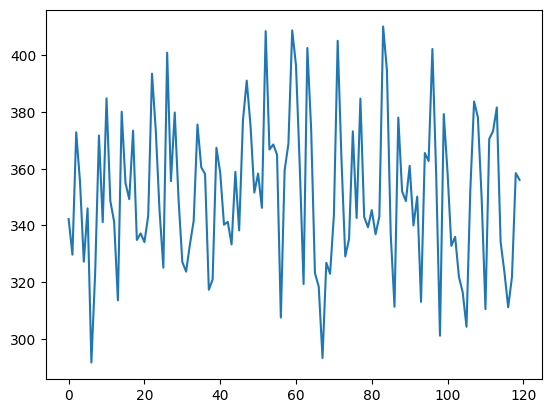

In [ ]:
plt.plot((h_f[0]+torch.mean(h_a[0])).detach().numpy())

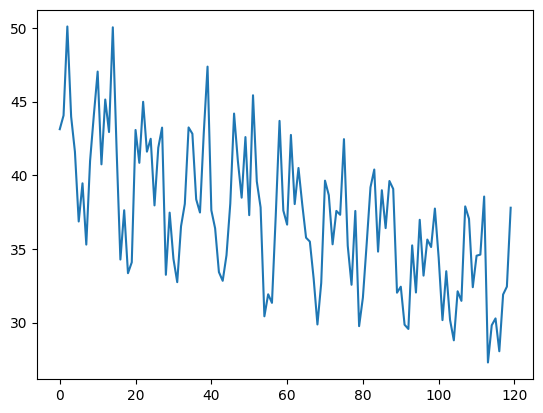

In [ ]:
plt.plot((h_a[0]).detach().numpy())

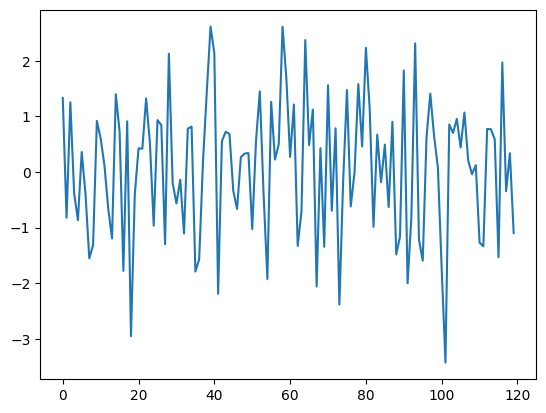

In [ ]:
plt.plot((h_f[10]).detach().numpy())

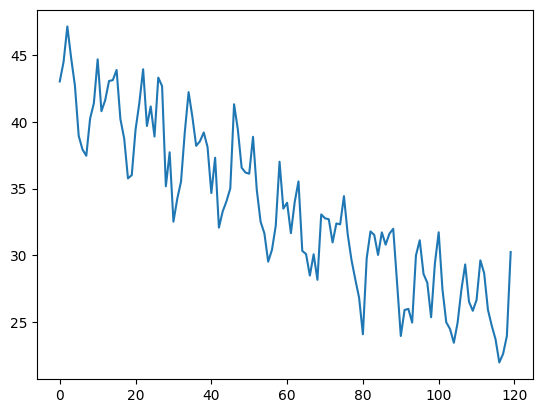

In [ ]:
plt.plot((h_a[10]).detach().numpy())

In [ ]:
# torch.var(x[0]-h_f[0])
torch.var(h_a[0])

tensor(66.1905, grad_fn=<VarBackward0>)

In [ ]:
m1 = [[1] for i in range(1,121)]
m2 = [[i] for i in range(1,121)]
m = torch.Tensor([m1, m2])
m = torch.squeeze(m).T

PLR_calc = torch.matmul(torch.matmul(torch.linalg.inv(torch.matmul(torch.transpose(m, 0, 1), m)), torch.transpose(m, 0, 1)), torch.transpose(h_a, 0, 1))
PLR_calc

tensor([[ 3.4844e+02,  3.4840e+02,  3.4838e+02,  3.4837e+02,  3.4834e+02,
          3.4831e+02,  3.4830e+02,  3.4830e+02,  3.4831e+02,  3.4832e+02,
          3.4833e+02,  3.4829e+02,  3.4822e+02,  3.4827e+02,  3.4828e+02,
          3.4828e+02,  3.4830e+02,  3.4828e+02,  3.4828e+02,  3.4831e+02,
          3.0328e+02,  3.0190e+02,  3.0327e+02,  3.0325e+02,  3.0328e+02,
          3.0321e+02,  3.0185e+02,  3.0317e+02,  3.0317e+02,  3.0317e+02,
          3.0318e+02,  3.0313e+02,  3.0311e+02,  3.0310e+02,  3.0174e+02,
          3.0182e+02,  3.0309e+02,  3.0172e+02,  3.0171e+02,  3.0309e+02,
          2.6667e+02,  2.6667e+02,  2.6666e+02,  2.6667e+02,  2.6668e+02,
          2.6667e+02,  2.6669e+02,  2.6668e+02,  2.6666e+02,  2.6666e+02,
          2.6666e+02,  2.6666e+02,  2.6666e+02,  2.6666e+02,  2.6666e+02,
          2.6666e+02,  2.6667e+02,  2.6666e+02,  2.6667e+02,  2.6668e+02,
          2.7609e+02,  2.7606e+02,  2.7609e+02,  2.6642e+02,  2.7599e+02,
          2.7600e+02,  2.7634e+02,  2.

In [19]:
# import torch
# from torch.nn import Linear
# from torch_geometric.nn import GATConv, GATv2Conv, GCNConv, TransformerConv, AGNNConv, FusedGATConv, ChebConv, SAGEConv, GraphConv, CuGraphGATConv, TAGConv, GMMConv
# from scipy.stats import linregress

# class GCN(torch.nn.Module):
#   def __init__(self):
#     super(GCN, self).__init__()
#     torch.manual_seed(42)

#     self.conv1 = TransformerConv(120, 60)
#     self.conv2 = GATConv(60, 30)
#     self.conv3 = TransformerConv(30, 60)
#     self.conv4 = GATConv(60, 120)


#     self.conv5 = TransformerConv(120, 60)
#     self.conv6 = GATConv(60, 30)
#     self.conv7 = TransformerConv(30, 60)
#     self.conv8 = GATConv(60, 120)



#   def forward(self, x, edge_index):
#     h_1 = self.conv1(x, edge_index)
#     h_2 = self.conv2(h_1, edge_index)
#     h_3 = self.conv3(h_2, edge_index)
#     h_a = self.conv4(h_3, edge_index)


#     h_5 = self.conv5(x, edge_index)
#     h_6 = self.conv6(h_5, edge_index)
#     h_7 = self.conv7(h_6, edge_index)
#     h_f = self.conv8(h_7, edge_index)

#     return h_a, h_f

model_save_path = os.path.join('gdrive/My Drive/Wavelet_GNN_PLR/Case1_Linear_best_model_v2_NF.pt')

model = GCN()
model.load_state_dict(torch.load(model_save_path))
model.eval()
h_a, h_f = model(x, edge_index)

PLR_matrix = (x-h_f).T
PLR_matrix.shape

RuntimeError: Error(s) in loading state_dict for GCN:
	Missing key(s) in state_dict: "conv2.att_src", "conv2.att_dst", "conv2.bias", "conv2.lin_src.weight", "conv2.lin_dst.weight", "conv4.att_src", "conv4.att_dst", "conv4.bias", "conv4.lin_src.weight", "conv4.lin_dst.weight", "conv6.att_src", "conv6.att_dst", "conv6.bias", "conv6.lin_src.weight", "conv6.lin_dst.weight", "conv8.att_src", "conv8.att_dst", "conv8.bias", "conv8.lin_src.weight", "conv8.lin_dst.weight". 
	Unexpected key(s) in state_dict: "conv2.lin_key.weight", "conv2.lin_key.bias", "conv2.lin_query.weight", "conv2.lin_query.bias", "conv2.lin_value.weight", "conv2.lin_value.bias", "conv2.lin_skip.weight", "conv2.lin_skip.bias", "conv4.lin_key.weight", "conv4.lin_key.bias", "conv4.lin_query.weight", "conv4.lin_query.bias", "conv4.lin_value.weight", "conv4.lin_value.bias", "conv4.lin_skip.weight", "conv4.lin_skip.bias", "conv6.lin_key.weight", "conv6.lin_key.bias", "conv6.lin_query.weight", "conv6.lin_query.bias", "conv6.lin_value.weight", "conv6.lin_value.bias", "conv6.lin_skip.weight", "conv6.lin_skip.bias", "conv8.lin_key.weight", "conv8.lin_key.bias", "conv8.lin_query.weight", "conv8.lin_query.bias", "conv8.lin_value.weight", "conv8.lin_value.bias", "conv8.lin_skip.weight", "conv8.lin_skip.bias". 

In [ ]:
PLR_dense = torch.FloatTensor(10, 100)
PLR_matrix
for j in range(100):
  PLR_inverter = []
  for i in range(10):
    PLR_dense[i][j] = torch.mean(PLR_matrix[12*i:12*(i+1),j])

# PLR_dense

In [ ]:
m1 = [[1] for i in range(1,11)]
m2 = [[i] for i in range(1,11)]
m = torch.Tensor([m1, m2])
m = torch.squeeze(m).T

PLR_calc = torch.matmul(torch.matmul(torch.linalg.inv(torch.matmul(torch.transpose(m, 0, 1), m)), torch.transpose(m, 0, 1)), torch.transpose(PLR_dense.T, 0, 1))
PLR_calc

tensor([[44.3830, 44.4626, 44.5269, 44.5380, 44.3620, 44.5163, 44.5988, 44.6170,
         44.6065, 44.7267, 44.9397, 45.1469, 44.5795, 44.4060, 44.3531, 44.4198,
         44.3657, 44.3437, 44.3001, 44.2304, 42.5493, 42.4992, 42.4404, 42.4523,
         42.4536, 42.4441, 42.4630, 42.4455, 42.4171, 42.4225, 42.4193, 42.4223,
         42.4314, 42.4669, 42.4465, 42.4509, 42.4443, 42.4437, 42.4561, 42.4621,
         39.4539, 39.5072, 39.5125, 39.7195, 39.5470, 39.3967, 39.3862, 39.4351,
         39.4939, 39.5208, 39.6698, 39.4112, 39.4134, 39.3896, 39.5049, 39.3985,
         39.3987, 39.4344, 39.4580, 39.3782, 40.6758, 40.5445, 40.8240, 40.9259,
         41.2349, 40.7286, 40.6192, 40.5496, 40.2312, 40.2594, 40.2114, 40.2152,
         40.1988, 40.0721, 40.1143, 40.1270, 40.2268, 40.2963, 40.2952, 40.1825,
         41.6327, 41.5080, 41.4043, 41.3741, 41.3816, 41.4078, 41.4409, 41.4660,
         41.2881, 41.2599, 41.2383, 41.2274, 41.2141, 41.2393, 41.2482, 41.2645,
         41.2227, 41.2269, 4

In [ ]:
PLR_calc.shape
PLR_derived = []

for i in range(100):
  P = (PLR_calc[0][i] + 10*PLR_calc[1][i] - PLR_calc[0][i])/ (PLR_calc[0][i]*10)
  PLR_derived.append(P.detach().numpy())


In [ ]:
PLR_derived

[array(-0.00613855, dtype=float32),
 array(-0.00576555, dtype=float32),
 array(-0.00533485, dtype=float32),
 array(-0.00503942, dtype=float32),
 array(-0.00438233, dtype=float32),
 array(-0.00366648, dtype=float32),
 array(-0.00324897, dtype=float32),
 array(-0.0034309, dtype=float32),
 array(-0.00363442, dtype=float32),
 array(-0.00378694, dtype=float32),
 array(-0.00407253, dtype=float32),
 array(-0.00316083, dtype=float32),
 array(-0.00224366, dtype=float32),
 array(-0.00251432, dtype=float32),
 array(-0.0028338, dtype=float32),
 array(-0.00295457, dtype=float32),
 array(-0.00327142, dtype=float32),
 array(-0.00276997, dtype=float32),
 array(-0.00279169, dtype=float32),
 array(-0.00356359, dtype=float32),
 array(-0.00736206, dtype=float32),
 array(-0.00652468, dtype=float32),
 array(-0.00708761, dtype=float32),
 array(-0.00628411, dtype=float32),
 array(-0.00735943, dtype=float32),
 array(-0.00489772, dtype=float32),
 array(-0.00489122, dtype=float32),
 array(-0.00372515, dtype=floa

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

error = mae(PLR, PLR_derived)
y_true, y_pred = np.array(PLR), np.array(PLR_derived)
print("PLR MAE of 100 simulated inverters is: "+ str(error))
print("PLR MAPE of 100 simulated inverters is: " + str(np.mean(np.abs((y_true - y_pred) / y_true)) * 100) + "%")

PLR MAE of 100 simulated inverters is: 0.00044598196019178624
PLR MAPE of 100 simulated inverters is: 1.868660694301767%


In [ ]:
# model_save_path = os.path.join('gdrive/My Drive/Wavelet_GNN_PLR/Case1_Linear_best_model_v2_NF.pt')
# torch.save(model.state_dict(), model_save_path)

# model = GCN()
# model.load_state_dict(torch.load(model_save_path))
# h_a, h_f = model(x, edge_index)

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

error = mae(PLR, PLR_derived)
y_true, y_pred = np.array(PLR), np.array(PLR_derived)
print("PLR MAE of 100 simulated inverters is: "+ str(error))
print("PLR MAPE of 100 simulated inverters is: " + str(np.mean(np.abs((y_true - y_pred) / y_true)) * 100) + "%")

PLR MAE of 100 simulated inverters is: 0.00030562381222692877
PLR MAPE of 100 simulated inverters is: 11.159017718388412%


In [54]:
# MAPE

def standard_error(tensor):
    # Calculate the standard deviation and number of observations
    std_dev = np.std(tensor, ddof=1)  # Use ddof=1 for sample standard deviation
    n = len(tensor)

    # Calculate the standard error
    se = std_dev / np.sqrt(n)

    return se



se_result = standard_error(np.mean(np.abs((RDP - correction) / RDP)) * 100)
se_result

0.04228377684838911

In [55]:
Error = []
for i in range(100):
  Error.append(np.linalg.norm(RDP.iloc[:, [i]].values - correction.iloc[:, [i]], axis=0))

standard_error(Error)

0.0017908017164334912

### Compare shape of EDP (esimtated degradation pattern) and RDP

In [25]:
import pandas as pd

RDP = pd.DataFrame()
index = list(range(0, 87601,720))[:120]

# def plr_hyperbolic_scale(scale, plr, ts_yrs = 10, sample_rate = 24):
#   a_cons = ((1 / (1 - plr * ts_yrs)) - 1 )/ (365 * sample_rate * ts_yrs)
#   return (1 / (a_cons * scale + 1))

def plr_linear_scale(scale, plr, sample_rate =24):
  return (1 - (scale * (plr) / (365* sample_rate)))

index = range(0, 87601,720)

for j in range(100):
  for i in range(120):
    RDP.loc[i,j] = plr_linear_scale(index[i], -PLR[j], 24)

RDP = RDP.groupby(np.arange(len(RDP.index))//12).mean()
first_row = RDP.iloc[0]
RDP = RDP.divide(first_row, axis=1)
RDP

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.977207,0.973473,0.970424,0.969897,0.978256,0.970979,0.967022,0.966134,0.966691,0.960941,...,0.994578,0.995131,0.995779,0.994531,0.994072,0.993294,0.995344,0.995178,0.994052,0.995371
2,0.954415,0.946946,0.940848,0.939795,0.956513,0.941958,0.934044,0.932268,0.933382,0.921882,...,0.989156,0.990263,0.991559,0.989063,0.988143,0.986587,0.990688,0.990357,0.988105,0.990743
3,0.931622,0.920419,0.911273,0.909692,0.934769,0.912937,0.901066,0.898402,0.900074,0.882822,...,0.983734,0.985394,0.987338,0.983594,0.982215,0.979881,0.986033,0.985535,0.982157,0.986114
4,0.908830,0.893891,0.881697,0.879589,0.913025,0.883916,0.868088,0.864537,0.866765,0.843763,...,0.978312,0.980525,0.983118,0.978126,0.976287,0.973174,0.981377,0.980714,0.976210,0.981486
5,0.886037,0.867364,0.852121,0.849487,0.891281,0.854895,0.835110,0.830671,0.833456,0.804704,...,0.972889,0.975657,0.978897,0.972657,0.970358,0.966468,0.976721,0.975892,0.970262,0.976857
6,0.863245,0.840837,0.822545,0.819384,0.869538,0.825874,0.802132,0.796805,0.800147,0.765645,...,0.967467,0.970788,0.974677,0.967189,0.964430,0.959761,0.972065,0.971070,0.964314,0.972229
7,0.840452,0.814310,0.792970,0.789281,0.847794,0.796853,0.769154,0.762939,0.766838,0.726586,...,0.962045,0.965919,0.970456,0.961720,0.958502,0.953055,0.967409,0.966249,0.958367,0.967600
8,0.817660,0.787783,0.763394,0.759179,0.826050,0.767832,0.736177,0.729073,0.733530,0.687526,...,0.956623,0.961051,0.966236,0.956252,0.952573,0.946348,0.962754,0.961427,0.952419,0.962972
9,0.794867,0.761256,0.733818,0.729076,0.804306,0.738811,0.703199,0.695207,0.700221,0.648467,...,0.951201,0.956182,0.962015,0.950783,0.946645,0.939642,0.958098,0.956605,0.946472,0.958343


In [28]:
EDP_SSA = ssa_df
first_row = EDP_SSA.iloc[0]
EDP_SSA = EDP_SSA.divide(first_row, axis=1)
EDP_SSA = EDP_SSA.groupby(np.arange(len(EDP_SSA.index))//10).mean()
first_row = EDP_SSA.iloc[0]
EDP_SSA = EDP_SSA.divide(first_row, axis=1)
EDP_SSA = EDP_SSA.iloc[0:10,:]
EDP_SSA

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.981182,0.977940,0.975274,0.974787,0.982089,0.975749,0.972275,0.971497,0.971971,0.966829,...,0.997064,0.997523,0.998066,0.997029,0.996654,0.995972,0.997692,0.997562,0.996617,0.997719
2,0.961313,0.954927,0.949754,0.948854,0.963079,0.950683,0.943946,0.942470,0.943369,0.933451,...,0.992557,0.993476,0.994554,0.992469,0.991730,0.990413,0.993814,0.993556,0.991663,0.993873
3,0.941654,0.932173,0.924486,0.923151,0.944305,0.925875,0.915844,0.913643,0.915012,0.900343,...,0.988762,0.990182,0.991772,0.988637,0.987491,0.985562,0.990666,0.990288,0.987423,0.990751
4,0.923641,0.911068,0.900834,0.899055,0.927160,0.902686,0.889351,0.886437,0.888249,0.868813,...,0.983379,0.985255,0.987380,0.983226,0.981691,0.979110,0.985937,0.985412,0.981609,0.986018
5,0.905454,0.889778,0.876972,0.874794,0.909841,0.879324,0.862680,0.859041,0.861298,0.837080,...,0.978459,0.980794,0.983471,0.978281,0.976358,0.973134,0.981692,0.980995,0.976257,0.981780
6,0.885740,0.866972,0.851679,0.849041,0.890990,0.854445,0.834561,0.830160,0.832875,0.803941,...,0.974253,0.977054,0.980269,0.974037,0.971730,0.967818,0.978139,0.977265,0.971607,0.978257
7,0.866023,0.844163,0.826337,0.823279,0.872125,0.829549,0.806403,0.801279,0.804449,0.770780,...,0.969868,0.973116,0.976888,0.969622,0.966933,0.962333,0.974370,0.973381,0.966768,0.974507
8,0.848212,0.823222,0.802836,0.799327,0.855195,0.806531,0.780067,0.774171,0.777830,0.739343,...,0.965356,0.969058,0.973387,0.965075,0.961986,0.956781,0.970474,0.969352,0.961817,0.970669
9,0.829076,0.801011,0.778112,0.774170,0.836921,0.782246,0.752532,0.745916,0.750031,0.706838,...,0.960788,0.964966,0.969806,0.960445,0.957001,0.951145,0.966539,0.965266,0.956849,0.966744


In [26]:
EDP = pd.DataFrame(PLR_matrix.detach().numpy())
first_row = EDP.iloc[0]
EDP = EDP.divide(first_row, axis=1)
EDP = EDP.groupby(np.arange(len(EDP.index))//12).mean()
first_row = EDP.iloc[0]
EDP = EDP.divide(first_row, axis=1)
EDP

NameError: name 'PLR_matrix' is not defined

In [29]:
EDP_MSTL = MSTL_df
first_row = EDP_MSTL.iloc[0]
EDP_MSTL = EDP_MSTL.divide(first_row, axis=1)
EDP_MSTL = EDP_MSTL.groupby(np.arange(len(EDP_MSTL.index))//12).mean()
first_row = EDP_MSTL.iloc[0]
EDP_MSTL = EDP_MSTL.divide(first_row, axis=1)
EDP_MSTL

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005528,1.002335,0.999698,0.999203,1.006451,1.000165,0.996771,0.995980,0.996487,0.991527,...,1.014149,1.014617,1.015175,1.014106,1.013714,1.012988,1.014786,1.014650,1.013686,1.014803
2,0.980669,0.973602,0.967888,0.966902,0.982641,0.968912,0.961511,0.959873,0.960896,0.950057,...,1.008023,1.009040,1.010255,1.007903,1.007075,1.005591,1.009430,1.009134,1.007012,1.009478
3,0.957525,0.946670,0.937857,0.936300,0.960589,0.939424,0.927970,0.925420,0.927027,0.910346,...,1.003144,1.004780,1.006598,1.002975,1.001648,0.999402,1.005332,1.004898,1.001580,1.005413
4,0.935394,0.920714,0.908736,0.906696,0.939520,0.910933,0.895394,0.891985,0.894125,0.871544,...,0.997329,0.999508,1.002015,0.997149,0.995343,0.992302,1.000344,0.999710,0.995252,1.000396
5,0.913187,0.894670,0.879574,0.876962,0.918390,0.882316,0.862722,0.858359,0.861062,0.832599,...,0.991222,0.993978,0.997137,0.990997,0.988722,0.984882,0.995049,0.994179,0.988616,0.995162
6,0.887226,0.864941,0.846759,0.843644,0.893468,0.850023,0.826459,0.821227,0.824480,0.790240,...,0.987428,0.990738,0.994570,0.987166,0.984430,0.979707,0.992009,0.991003,0.984262,0.992128
7,0.865510,0.839365,0.818038,0.814359,0.872846,0.821904,0.794248,0.788049,0.791920,0.751725,...,0.981101,0.984962,0.989473,0.980792,0.977565,0.972125,0.986429,0.985253,0.977398,0.986630
8,0.841313,0.811385,0.786965,0.782754,0.849682,0.791367,0.759707,0.752647,0.757055,0.711071,...,0.975158,0.979592,0.984741,0.974777,0.971130,0.964881,0.981275,0.979919,0.970974,0.981467
9,0.818087,0.784335,0.756800,0.752038,0.827547,0.761782,0.726080,0.718077,0.723095,0.671218,...,0.970471,0.975479,0.981284,0.970058,0.965933,0.958895,0.977398,0.975879,0.965754,0.977631


In [ ]:
EDP_STGCN1 = pd.DataFrame(PLR_matrix.detach().numpy())
first_row = EDP_STGCN1.iloc[0]
EDP_STGCN1 = EDP_STGCN1.divide(first_row, axis=1)
EDP_STGCN1 = EDP_STGCN1.groupby(np.arange(len(EDP_STGCN1.index))//12).mean()
first_row = EDP_STGCN1.iloc[0]
EDP_STGCN1 = EDP_STGCN1.divide(first_row, axis=1)
EDP_STGCN1

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.978712,0.974931,0.971862,0.971282,0.979782,0.972402,0.968439,0.967562,0.968066,0.962296,...,0.990275,0.990808,0.991474,0.990227,0.989778,0.988942,0.991013,0.990871,0.989730,0.991044
2,0.967584,0.960063,0.953990,0.952953,0.969695,0.955102,0.947216,0.945475,0.946546,0.935025,...,0.988945,0.990075,0.991372,0.988873,0.987971,0.986406,0.990483,0.990172,0.987904,0.990524
3,0.914380,0.903124,0.893972,0.892347,0.917565,0.895599,0.883688,0.881088,0.882705,0.865378,...,0.976368,0.978056,0.979946,0.976214,0.974853,0.972521,0.978629,0.978195,0.974767,0.978736
4,0.916945,0.901951,0.889699,0.887627,0.921164,0.891968,0.876064,0.872591,0.874754,0.851660,...,0.964845,0.967055,0.969624,0.964650,0.962817,0.959740,0.967911,0.967262,0.962722,0.967975
5,0.880207,0.861481,0.846283,0.843619,0.885457,0.849011,0.829232,0.824826,0.827535,0.798757,...,0.965976,0.968779,0.972006,0.965770,0.963452,0.959499,0.969874,0.968995,0.963312,0.969991
6,0.872461,0.849951,0.831570,0.828426,0.878753,0.834901,0.811061,0.805799,0.809043,0.774425,...,0.962636,0.965939,0.969810,0.962398,0.959659,0.954967,0.967236,0.966239,0.959481,0.967363
7,0.830862,0.804652,0.783261,0.779569,0.838237,0.787132,0.759367,0.753169,0.757016,0.716657,...,0.954597,0.958476,0.962989,0.954305,0.951073,0.945638,0.959928,0.958759,0.950926,0.960125
8,0.824235,0.794384,0.770004,0.765809,0.832595,0.774419,0.742791,0.735746,0.740139,0.694179,...,0.953697,0.958115,0.963235,0.953343,0.949731,0.943497,0.959779,0.958444,0.949558,0.959992
9,0.793452,0.759876,0.732488,0.727747,0.802853,0.737441,0.701916,0.693961,0.698927,0.647244,...,0.949309,0.954286,0.960082,0.948917,0.944788,0.937795,0.956207,0.954708,0.944613,0.956450


In [ ]:
EDP_STGCN2 = pd.DataFrame(PLR_matrix.detach().numpy())
first_row = EDP_STGCN2.iloc[0]
EDP_STGCN2 = EDP_STGCN2.divide(first_row, axis=1)
EDP_STGCN2 = EDP_STGCN2.groupby(np.arange(len(EDP_STGCN2.index))//12).mean()
first_row = EDP_STGCN2.iloc[0]
EDP_STGCN2 = EDP_STGCN2.divide(first_row, axis=1)
EDP_STGCN2

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992489,0.988705,0.985635,0.985053,0.993559,0.986174,0.982210,0.981333,0.981836,0.976062,...,0.995100,0.995636,0.996306,0.995051,0.994599,0.993757,0.995842,0.995699,0.994550,0.995874
2,0.960020,0.952429,0.946300,0.945253,0.962149,0.947423,0.939463,0.937706,0.938787,0.927159,...,1.000962,1.002099,1.003403,1.000889,0.999982,0.998407,1.002509,1.002196,0.999914,1.002550
3,0.938069,0.926773,0.917590,0.915958,0.941265,0.919222,0.907269,0.904661,0.906282,0.888894,...,0.986564,0.988265,0.990169,0.986409,0.985038,0.982689,0.988842,0.988405,0.984951,0.988950
4,0.912774,0.897662,0.885313,0.883225,0.917026,0.887600,0.871571,0.868069,0.870250,0.846972,...,0.990075,0.992299,0.994883,0.989879,0.988035,0.984939,0.993159,0.992506,0.987938,0.993224
5,0.888439,0.869591,0.854293,0.851611,0.893723,0.857038,0.837129,0.832694,0.835421,0.806452,...,0.989556,0.992378,0.995626,0.989348,0.987015,0.983035,0.993480,0.992595,0.986873,0.993597
6,0.868025,0.845341,0.826819,0.823649,0.874365,0.830175,0.806150,0.800846,0.804117,0.769228,...,0.968201,0.971532,0.975437,0.967962,0.965199,0.960466,0.972842,0.971835,0.965019,0.972969
7,0.841924,0.815541,0.794009,0.790293,0.849347,0.797906,0.769957,0.763718,0.767590,0.726962,...,0.962579,0.966491,0.971043,0.962284,0.959025,0.953543,0.967955,0.966776,0.958877,0.968154
8,0.823272,0.793200,0.768639,0.764413,0.831694,0.773086,0.741224,0.734125,0.738552,0.692247,...,0.959809,0.964265,0.969430,0.959452,0.955809,0.949520,0.965945,0.964598,0.955634,0.966159
9,0.797992,0.764178,0.736595,0.731820,0.807460,0.741583,0.705805,0.697793,0.702794,0.650740,...,0.947859,0.952881,0.958731,0.947463,0.943296,0.936240,0.954821,0.953308,0.943120,0.955066


In [ ]:
# np.linalg.norm(RDP.iloc[:, [1]].values - EDP_norm.iloc[:, [1]], axis=0)
Error = []
for i in range(100):
  Error.append(np.linalg.norm(RDP.iloc[:, [i]].values - EDP.iloc[:, [i]], axis=0))
np.mean(Error)

0.01498414269909802

In [ ]:
# np.linalg.norm(RDP.iloc[:, [1]].values - EDP_norm.iloc[:, [1]], axis=0)
Error = []
for i in range(100):
  Error.append(np.linalg.norm(RDP.iloc[:, [i]].values - EDP.iloc[:, [i]], axis=0))
np.mean(Error)

0.026559191304442308

In [ ]:
# np.linalg.norm(RDP.iloc[:, [1]].values - EDP_norm.iloc[:, [1]], axis=0)
Error = []
for i in range(100):
  Error.append(np.linalg.norm(RDP.iloc[:, [i]].values - EDP_SSA.iloc[:, [i]], axis=0))
np.mean(Error)

0.058617093160237416

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

error = mae(RDP, EDP_SSA)
y_true, y_pred = np.array(RDP), np.array(EDP_SSA)
print("PLR MAE of 100 simulated inverters is: "+ str(error))
print("PLR MAPE of 100 simulated inverters is: " + str(np.mean(np.abs((y_true - y_pred) / y_true)) * 100) + "%")

PLR MAE of 100 simulated inverters is: 0.015542313740361182
PLR MAPE of 100 simulated inverters is: 2.0258206203491347%


In [ ]:
# model_save_path1 = os.path.join('gdrive/My Drive/Wavelet_GNN_PLR/Case1_Linear_best_model_STGAE1.pt')
# model_save_path2 = os.path.join('gdrive/My Drive/Wavelet_GNN_PLR/Case1_Linear_best_model_STGAE2.pt')

# torch.save(STGAE1.state_dict(), model_save_path1)
# torch.save(STGAE2.state_dict(), model_save_path2)

model_save_path = os.path.join('gdrive/My Drive/Wavelet_GNN_PLR/Case1_Linear_best_model_STGAE_NS.pt')

torch.save(model.state_dict(), model_save_path)


In [ ]:
from sklearn.metrics import mean_absolute_error as mae

error = mae(RDP, EDP)
y_true, y_pred = np.array(RDP), np.array(EDP)
print("PLR MAE of 100 simulated inverters is: "+ str(error))
print("PLR MAPE of 100 simulated inverters is: " + str(np.mean(np.abs((y_true - y_pred) / y_true)) * 100) + "%")

PLR MAE of 100 simulated inverters is: 0.006196882793186523
PLR MAPE of 100 simulated inverters is: 0.6919588424991182%


In [ ]:
from sklearn.metrics import mean_absolute_error as mae

error = mae(RDP, EDP)
y_true, y_pred = np.array(RDP), np.array(EDP)
print("PLR MAE of 100 simulated inverters is: "+ str(error))
print("PLR MAPE of 100 simulated inverters is: " + str(np.mean(np.abs((y_true - y_pred) / y_true)) * 100) + "%")

PLR MAE of 100 simulated inverters is: 0.025904855884363705
PLR MAPE of 100 simulated inverters is: 2.8397645169797627%


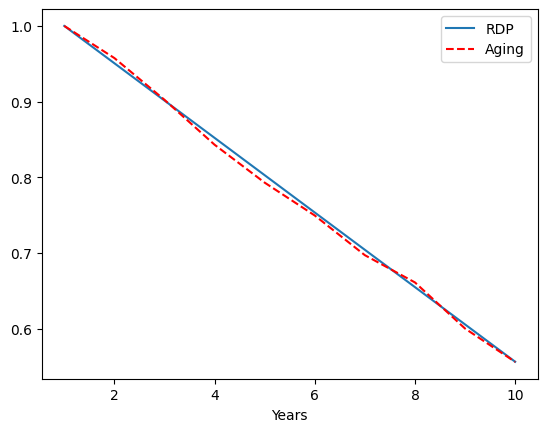

In [ ]:
# importing package
import matplotlib.pyplot as plt
import numpy as np

# create data
L = [[i] for i in range(1,11)]

# plot lines
plt.plot(L, RDP[10], label = "RDP", linestyle="-")
plt.plot(L, EDP[10], label = "Aging", linestyle="--", color = 'red')
plt.xlabel('Years')
# plt.plot(L, h_f[15].detach().numpy(), label = "Fluctuation", linestyle="-.", color = 'black')
plt.legend()
plt.show()

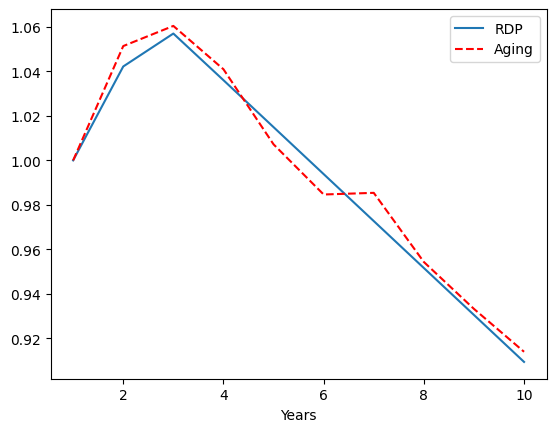

In [ ]:
# importing package
import matplotlib.pyplot as plt
import numpy as np

# create data
L = [[i] for i in range(1,11)]

# plot lines
plt.plot(L, RDP[10], label = "RDP", linestyle="-")
plt.plot(L, EDP[10], label = "Aging", linestyle="--", color = 'red')
plt.xlabel('Years')
# plt.plot(L, h_f[15].detach().numpy(), label = "Fluctuation", linestyle="-.", color = 'black')
plt.legend()
plt.show()

In [ ]:
df = pd.DataFrame(columns=["PLR_Pred", "Ground_Truth"])
df["PLR_Pred"] = y_pred
df["Ground_Truth"] = y_true
df.to_csv("gdrive/My Drive/Wavelet_GNN_PLR/PLR_Pred.csv",index=False)

In [ ]:
# pip install pandas --upgrade

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

error = mae(PLR, PLR_derived)
y_true, y_pred = np.array(PLR), np.array(PLR_derived)
y_pred = y_pred[60:80]
y_true = y_true[60:80]
print("PLR MAE of 100 simulated inverters is: "+ str(error))
print("PLR MAPE of 100 simulated inverters is: " + str(np.mean(np.abs((y_true - y_pred) / y_true)) * 100) + "%")

PLR MAE of 100 simulated inverters is: 0.00030562381222692877
PLR MAPE of 100 simulated inverters is: 13.589945011763682%


In [ ]:
def plr_pw_scale(scale, plr, seg_len, sample_rate =24):
  if scale < seg_len + 1:
    return  (1 - (scale * -2 * (plr) / (365* sample_rate)))
  else:
    return  ((1 - ((-3 * seg_len * plr) / (365* sample_rate))) - (scale * (plr) / (365* sample_rate)))

def plr_linear_scale(scale, plr, sample_rate =24):
  return (1 - (scale * (plr) / (365* sample_rate)))

def plr_exponential_scale(scale, plr, ts_yrs = 10, sample_rate = 24):
  t_cons = np.log(1 - plr * ts_yrs) / (365 * sample_rate * ts_yrs)
  return (np.exp(t_cons * scale))

def plr_hyperbolic_scale(scale, plr, ts_yrs = 10, sample_rate = 24):
  a_cons = ((1 / (1 - plr * ts_yrs)) - 1 )/ (365 * sample_rate * ts_yrs)
  return (1 / (a_cons * scale + 1))

site_df[site_name] = site_df[site_name] * site_df["scale"].apply(plr_hyperbolic_scale, plr = plr)